In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("A2.ipynb")

# Assignment 2 (10 Points in total, will be 10% of your grade)

## How to complete assignments

There are both code and math/text components to these assignments.

### Math/text responses

Whenever you see:

```markdown
_Type your answer here, replacing this text._ 
```

You should editing this Markdown cell and insert your answers. 

If the question is asking for math use LaTeX. We understand not everyone is fluent in LaTeX but we think this is a good skill to learn. [Here is a fantastic tutorial from CalTech about using $\LaTeX$ in Jupyter Notebook.](http://chebe163.caltech.edu/2018w/handouts/intro_to_latex.html). You could also find various $\LaTeX$ tutorials and cheat sheets online. 

Some things to keep in mind:  Jupyter's Markdown-LaTeX will display things that don't work when you turn in the assignment. Here are some generic ideas that we find prevent trouble down the road. 
1. Test your output to see if it works well when you submit.  So execute the otter grader export and check the PDF to make sure it looks right!!! 
1. Avoid ```$x=1$ ``` use ```$$x=1$$``` instead
1.  No trailing space after the first dollar sign and before the second dollar sign. i.e. don't do `$ $ x = 5 $ $` use `$$x=5$$` instead
1. Markdown lists in the same cell after a math environment don't seem to work, and we don't know why
1. Avoid ```\align``` use ```\aligned``` instead

An example:


#### Question: Given a triangle with sides $x,y,z$ where $x=3$, $y=4$ calculate $z$

Your answer in the markdown should be

```
$$z = \sqrt{x^2 + y^2} = \sqrt{3^2+4^2} = \sqrt{25} = 5$$
```
which will render as 

$$z = \sqrt{x^2 + y^2} = \sqrt{3^2+4^2} = \sqrt{25} = 5$$


These responses will mostly be manually graded. There is leeway for individual style in notation, so don't worry too much as long as you don't write anything that is false. 

### Code responses

Whenever you see:

```python
answers = ...
```

You need to replace this section with some code that answers the questions and meets the specified criteria. Make sure you remove the 'raise' line when you do this (or your notebook will raise an error, regardless of any other code, and thus fail the grading tests).

You should write the answer to the questions in those cells (the ones with `...`), but you can also add extra cells to explore / investigate things if you need / want to. 

Any cell with `grader.check("Question_id")` statements in it is a test cell. You should not try to change or delete these cells. Note that there might be more than one assert that tests a particular question. Once you run the cell, you will see the public tests we provided for you.

If a test does fail, reading the error that is printed out should let you know which test failed, which may be useful for fixing it.

Note that some cells, including the test cells, may be read only, which means they won't let you edit them. If you cannot edit a cell - that is normal, and you shouldn't need to edit that cell.

# Q1: Mixture of Bernoullis (1 Point)

<!-- BEGIN QUESTION -->

## Q1.1 Mixture of Distributions
Consider a mixture distribution of the form 
$$p(x) = \sum_{k=1}^K \pi_k p(x|k)$$
where you may assume the elements of $x$ are discrete, and $\vec \pi$ is a $k$ dimensional vector that satisfy the following condition $\sum_k \pi_k = 1$. Denote the mean and covariance of $p(x|k)$ by $\mu_k$ and $\Sigma_k$, respectively.  Show that the mean of the mixture distribution is given by the following equation:
$$\mathbb{E}[\text{x}] = \sum_{k=1}^K \pi_k\mu_k$$

To get there you may want to start with the definition of the mixture $p(x)$ above.  Reminder, the generic definition of expectation:
$$\mathbb{E}[\text{x}] = \sum_x x p(x)$$

_Points:_ 0.3

$$\mathbb{E}[\text{x}] = \sum_x x p(x) = \sum_x x \sum_{k = 1}^K \pi_k p(x|k) = \sum_{k=1}^{K} \pi_k \sum_x xp(x|k) = \sum_{k=1}^K \pi_k\mu_k$$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Illustration of Bernoulli Mixture Model on MNIST dataset
We illustrate the Bernoulli mixture model to model handwritten digits from the MNIST dataset. Here the digit images have been turned into binary vectors by setting all elements whose values exceed 0.5 to 1 and setting the remaining elements to 0. A sample of this binary-valued MNIST is shown below for just the digits 2, 3, and 4. In other words, the only two possible pixel intensities of the MNIST is now $0$ (fully black) and $1$ (fully white). In this setting, we can consider each individual pixel as a bernoulli random variable.

![title](imgs/mnist_bernoulli.png)

This approach would fit each digit with a Bernoulli parameter vector as long as the number of pixels in an image.  And we'd converge to the correct parameter vectors by running iterations of the EM algorithm. 

## Q1.2 Mixture of Bernoulli Distribution

Consider the joint distribution of latent and observed variables for the Bernoulli distribution obtained by forming the product of $p(x|z,\mu)$ (given by Bishop equation (9.52)):
$$p(x|z,\mu) = \prod_{k=1}^K p(x|\mu_k)^{z_k}$$
and $p(z|\pi)$ (given by Bishop equation (9.53)):
$$p(z|\pi) = \prod_{k=1}^K \pi_k^{z_k}$$
Show that if we marginalize this joint distribution with respect to $z$, then we obtain the following equation:
$$p(x|\mu, \pi) = \sum_{k=1}^K \pi_k p(x|\mu_k)$$

Hint: you might want to read the pages of Bishop noted above. Also when we say "marginalize with respect to $z$", you should review what that means and start with the definition of marginalizing over a latent variable. 

_Points:_ 0.3

$$
\begin{aligned}
&\text{Multiply: }p(x|\mu, \pi) = p(x|z,\mu) \cdot p(z|\pi)= \prod_{k=1}^K p(x|\mu_k)^{z_k} \cdot\pi_k^{z_k} \\
&\text{Marginalize: }\sum_{z=1}^K\prod_{k=1}^K \pi_k^{z_n}(x|\mu_k)^{z_k} = \sum_{z=1}^K\pi_k(x|\mu_k)
\end{aligned}
$$

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1.3 Mixture of Bernoulli Distribution M-step
Show that if we maximize the expected complete-data log likelihood function (Bishop equation (9.55))
$$\mathbb{E}_z[\ln p(\text{Z,X}|\mu, \pi)] = \sum_{n=1}^N\sum_{k=1}^K\gamma(z_{nk})\biggl\{\ln \pi_k + \sum_{i=1}^D[x_{ni}\ln\mu_{ki} + (1-x_{ni})\ln(1-\mu_{ki})]  \biggl\}$$
for a mixture of Bernoulli distributions with respect to $\mu_k$, we obtain the M-step equation below:
$$\mu_k = \frac{1}{N_k}\sum_{n=1}^N\gamma(z_{nk})x_n,$$
that is, the k-th mean's MLE is a $\gamma(z_{nk})$ weighted mean of the entire dataset.

_Hint:_ you will want to start with the idea that we always go to when we want to maximize a convex function (as log likelihood is indeed convex). Make sure you are doing this process with respect to the variable you are trying to maximize.

_Points:_ 0.4

$$
\begin{aligned}
0 =\frac{\partial \mathbb{E}_z[\ln p(\text{Z,X}|\mu, \pi)]}{\partial\mu_k} &= \sum_{n=1}^N\sum_{k=1}^K\gamma(z_{nk}) \biggl\{\sum_{i=1}^D\frac{x_{ni}}{\mu_{ki}} - \frac{1}{1-\mu_{ki}} + \frac{x_{ni}}{1-\mu_{ki}} \biggl\} \\
&= \sum_{n=1}^N\sum_{k=1}^K\gamma(z_{nk}) \biggl\{\sum_{i=1}^D\frac{x_{ni}(1-\mu_{ki})+\mu_{ki}(x_{ni}-1)}{\mu_{ki}(1-\mu_{ki})} \biggl\}\\
&= \sum_{n=1}^N \gamma(z_{nk}) \biggl\{x_{n}(1-\mu_{k})+\mu_{k}(x_{n}-1) \biggl\}\\
&= \sum_{n=1}^N \gamma(z_{nk}) (x_{n} - \mu_{k})\\
&= \sum_{n=1}^N \gamma(z_{nk}) (x_{n}) - \sum_{n=1}^N \gamma(z_{nk}) (\mu_{k}) \\\\\\

\mu_{k} &= \frac{\sum_{n=1}^N \gamma(z_{nk}) (x_{n})}{\sum_{n=1}^N \gamma(z_{nk})}\\
&= \frac{1}{N_k}\sum_{n=1}^N\gamma(z_{nk})x_n
\end{aligned}
$$

<!-- END QUESTION -->

# Q2: K-Means (3.5 Points)
#### Algorithm Description

Suppose we have a dataset $\mathcal{D}=\{x_1, \dots, x_N\}$ consisting of $N$ observations of a $D$-dimensional variable $x$. In clustering, the distortion measure of the cluster is given by 

$$
J = \sum_{n=1}^N\sum_{k=1}^Kr_{nk} ||x_n-\mu_k||^2
$$

where $\mu_k$ is a prototype associated with the $k^{\text{th}}$ cluster, and $r_{nk} \in \{0, 1\}$ is a binary indicator variables where $k = 1, \dots, K$ describing which of the $k$ cluster the data point $x_n$ is assigned to, so that if data point $x_n$ is assigned to cluster $k$ then $r_{nk} = 1$ and $r_{nj} = 0$ for $j \neq k$.

The objective of the K-Means algorithm is to find values for the $r_{nk}$ and the $\mu_k$ so as to minimize the distortion measure, i.e.

$$
\arg\min_{r, \mu} \sum_{n=1}^N\sum_{k=1}^Kr_{nk} ||x_n-\mu_k||^2
$$

_Note:_ Compared with the objective function you saw in the lecture slides $\arg\min_C\sum_{i=1}^k\sum_{x_j\in C_i} ||x_j - \mu_{C_i}||^2$ this is a more nuanced way to express the K-means objective. In this question, we will explore the underlying update rules of the K-Means algorithms.

#### Algorithm Pseudocode

1. Choose some initial values for the $\mu_k$ (Initialize the Centroids)
2. Repeat until converged:
    1. Keeping $\mu_k$ fixed, minimizing $J$ w.r.t. $r_{nk}$ **(E-Step)**
    2. Keeping $r_{nk}$ fixed, minimizing $J$ w.r.t. $\mu_k$ **(M-Step)**

#### Optimizing for $J$

For the **(E-Step)**, when the $\mu_k$ is fixed, it is rather simple to minimize the function value of $J$ since $J$ is a linear function of $r_{nk}$. The terms involving different $n$ are independent and so we can optimize for each $n$ separately by choosing $r_{nk}$ to be 1 for whichever value of $k$ gives the minimum value of $||x_n - \mu_j||^2$. In other words, we simply assign the nth data point to the closest cluster center.


<!-- BEGIN QUESTION -->

## Question 2.1 Update Rule for $\mu_k$

Once we minimizing $J$ w.r.t. $r_{nk}$ while fixing $\mu_k$, we will continue to minimize $J$ w.r.t. $\mu_k$ fixing $r_{nk}$ fixed. Prove that
$$
\hat \mu_k = \arg\min_{\mu_k}\sum_{n=1}^N\sum_{k=1}^Kr_{nk} ||x_n-\mu_k||^2 = \frac{\sum_n r_{nk}x_n}{\sum_n r_{nk}}
$$

*Hint:* Take the derivative of $J$ w.r.t. $\mu_k$, and find the critical point.

_Points:_ 0.4

$$\frac{\partial J}{\partial \mu_k} = \sum_{n=1}^N\sum_{k=1}^Kr_{nk} ||x_n-\mu_k||^2 = 2 \sum_{n=1}^N r_{nk} (x_n - \mu_k) = 0$$  

$$\text{Solve for }\mu_k \\  2\sum_{n=1}^N r_{nk} x_n - 2\sum_{n=1}^N r_{nk}\mu_k = 0 \\ \sum_{n=1}^N r_{nk} x_n = \sum_{n=1}^N r_{nk}\mu_k \\ \mu_k = \frac{\sum_{n=1}^N r_{nk} x_n} {\sum_{n=1}^N r_{nk}} $$


<!-- END QUESTION -->

The denominator in this expression is equal to the number of points assigned to cluster $k$, and so this result has a simple interpretation, namely set $\mu k$ equal to the mean of all of the data points $x_n$ assigned to cluster $k$. For this reason, the procedure is known as the K-means algorithm.

For the rest of the question, you will implement your own version of the K-Means clustering algorithm. To begin with, let's create some toy data. This is borrowed from the lecture notebook.

#### Data Generation

In [3]:
# things we will need to do stuff in this notebook
import doctest
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import make_blobs
from scipy.stats import multivariate_normal
from tqdm import tqdm
from matplotlib.patches import Ellipse

# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("white")
sns.set_context("notebook")

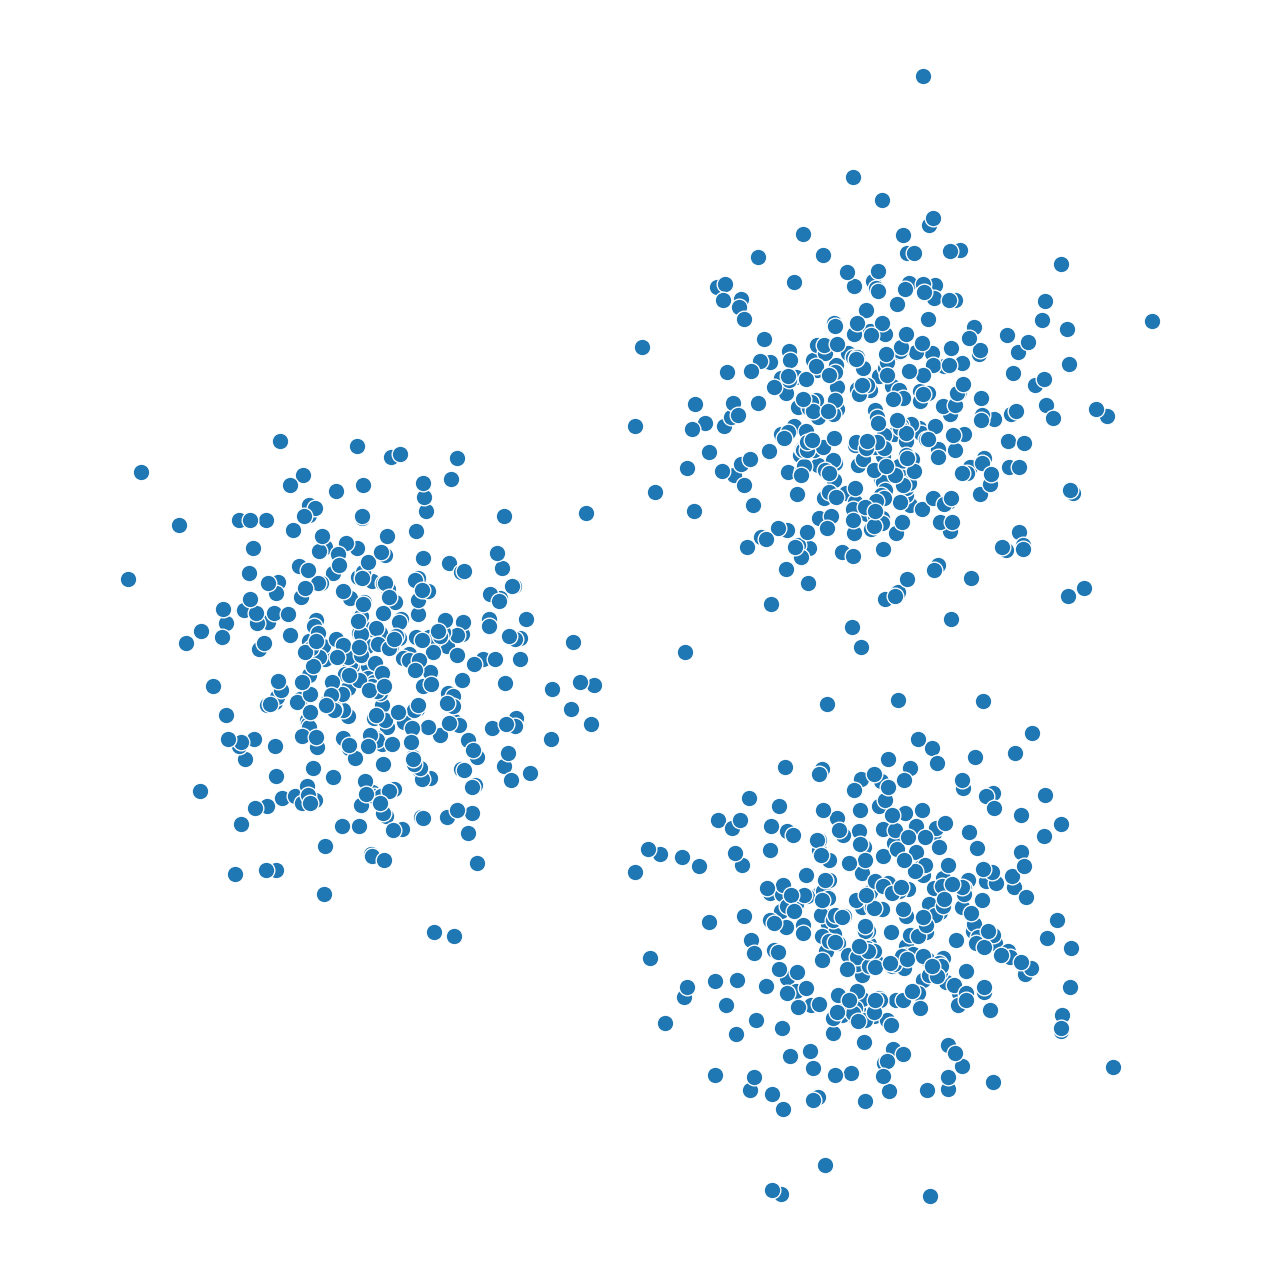

In [4]:
# Generating Dataset

points, labels = make_blobs(
    cluster_std=7.0, n_samples=1000, n_features=2, random_state=42, centers=[ [20,20], [-20,0], [20,-20]]
)

data_KMeans = pd.DataFrame(points,columns=['x','y'])

# Define a helper function
def plot_cluster(data:pd.DataFrame, km=None, plot_init=False, ax=None):
    """
    helper function to plot out the clusters. When km is unspecified, it will
    plot out the dataset. When km is specified, it will plot out the
    results of the km's cluster.
    """
    # Take a look at the cluster
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes()
    if km is None:
        sns.scatterplot(data=data,x='x',y='y',ax=ax);
    else:
        sns.scatterplot(data=data,x='x',y='y',ax=ax, hue=km.membership, palette='Paired');
        plt.scatter(
                km.centroids[:, 0],
                km.centroids[:, 1],
                s=100, marker=",", c="r",
                label="Centroids"
            )
        plt.legend()
    if plot_init:
        plt.scatter(
            km.initial_centroids[:, 0],
            km.initial_centroids[:, 1],
            s=100, facecolors='none', edgecolors='r',
            label="Initial Centroid"
        )
        plt.legend()
    plt.axis('equal');
    plt.axis('off');

plot_cluster(data_KMeans)

## Question 2.2 K-Means Implementation

Implement each methods of the class `MyKMeans` below. We've provided doctests (public tests) for each of the methods. But be careful... just because you pass the doctests doesn't mean you're good.  These tests provide basic sanity checks, but do not extensively test the correctness of your implementation. If you want to check the validity of your code, you should write your own tests --  either high-level tests, such as examining the end results of the K-Means clusters, or low-level tests, such as asserting each data is in the correct shape and datatype.

_Points:_ 2.1

In [8]:
class MyKMeans():
    """
    Your own KMeans implementation
    """

    def __init__(self, k) -> None:
        # this hints you about the type of each arguments
        self.k = k
        self.data = np.array([[]])
        self.initial_centroids = np.array([[]])
        self.centroids = np.array([[]])
        self.membership = np.array([])
    
    def euc_distances(self, target_pt:np.ndarray, pts:np.ndarray) -> np.ndarray:
        """
        Calculating the euclidean distances between a single target point and 
        a numpy array of datapoints. Return a numpy array of distances.

        Doctest/Example:
        >>> km1 = MyKMeans(k=1)
        >>> target_pt = np.array([0,0])
        >>> pts = np.array([[0,0], [1,0], [0,1]])
        >>> km1.euc_distances(target_pt, pts)
        array([0., 1., 1.])
        """
        norms = []
        for pt in pts : 
            norm = np.sqrt(np.sum((np.square(target_pt - pt))))
            norms.append(norm)

        return np.array(norms)


    def _load_data(self, data) -> None:
        """
        internal methods. assign data to self.data

        Doctest/Example:
        >>> km1 = MyKMeans(k=1)
        >>> data = np.array([[0,0],[1,1]])
        >>> km1._load_data(data)
        >>> np.isclose(data, km1.data).all()
        True
        >>> 
        """
        self.data = data

    def _init_centroids(self):
        """
        internal methods. randomly initialize k centroids by sampling k points without replacement
        from the dataset. Assign the centroids to the self.centroids

        Doctest/Example:
        >>> km2 = MyKMeans(k=2)
        >>> target_pt = np.array([0,0])
        >>> data = np.array([[0,0], [0,0], [0,0]])
        >>> km2._load_data(data)
        >>> km2._init_centroids()
        >>> km2.centroids.shape
        (2, 2)
        """
        # we provided this for you
        idx = np.random.choice(self.data.shape[0], self.k, replace=False)
        self.centroids = self.data[idx]
        self.initial_centroids = self.data[idx]
    
    def E_step(self) -> None:
        """
        Compute the E-step of the K-Means. This is calculating membership array 
        that indicates the membership of the data at that corresponding index. 

        For example, if self.membership is [0, 0, 1], this means that the first and 
        the second data points are closer to centroid 0 (self.centroid[0]), and the 
        third data point is closer to the center 1 (self.centroid[1])

        Doctest/Example:
        >>> km2 = MyKMeans(k=2)
        >>> data = np.array([[0,0], [0,0], [0,0]])
        >>> km2._load_data(data)
        >>> km2._init_centroids()
        >>> km2.E_step()
        >>> km2.membership
        array([0, 0, 0])
        """
        distance = np.zeros(shape=(len(self.data), self.k))
        for i, centroid in enumerate(self.centroids):
            distance[:,i] = self.euc_distances(centroid, self.data)
        self.membership = np.argmin(distance, axis = 1)

    def M_step(self) -> None:
        """
        Compute the M-step of the K-means. Update the self.centroids according
        to the new membership array.

        >>> km2 = MyKMeans(k=2)
        >>> np.random.seed(42)
        >>> data = np.array([[0], [0], [10], [10]])
        >>> km2._load_data(data)
        >>> km2._init_centroids()
        >>> km2.E_step()
        >>> km2.M_step()
        >>> km2.centroids.shape
        (2, 1)
        >>> np.isclose(km2.centroids, np.array([[0], [10]])).all()
        True
        """
        for value in range(self.k):
            cluster_pts = self.data[self.membership == value] 
            self.centroids[value] = np.mean(cluster_pts, axis = 0)


    def fit(self, data, iteration=100) -> np.ndarray:
        """
        Run the K-Means algorithm based on the dataset
        """
        # we provided this for you
        self._load_data(data)
        self._init_centroids()
        for _ in range(iteration):
            self.E_step()
            self.M_step()
        return self.membership

In [9]:
# Run the doctest
doctest.testmod()

TestResults(failed=0, attempted=29)

#### Clusters Visualizations

Run the following cell to take a look at the K-Means cluster. 

_(Not Graded, just FYI:)_ Run the following cell several times. What did you see? Are the clusters' shape consistent between each run? Are the color of the clusters consistent between each run?  Are the labels consistent between each run?

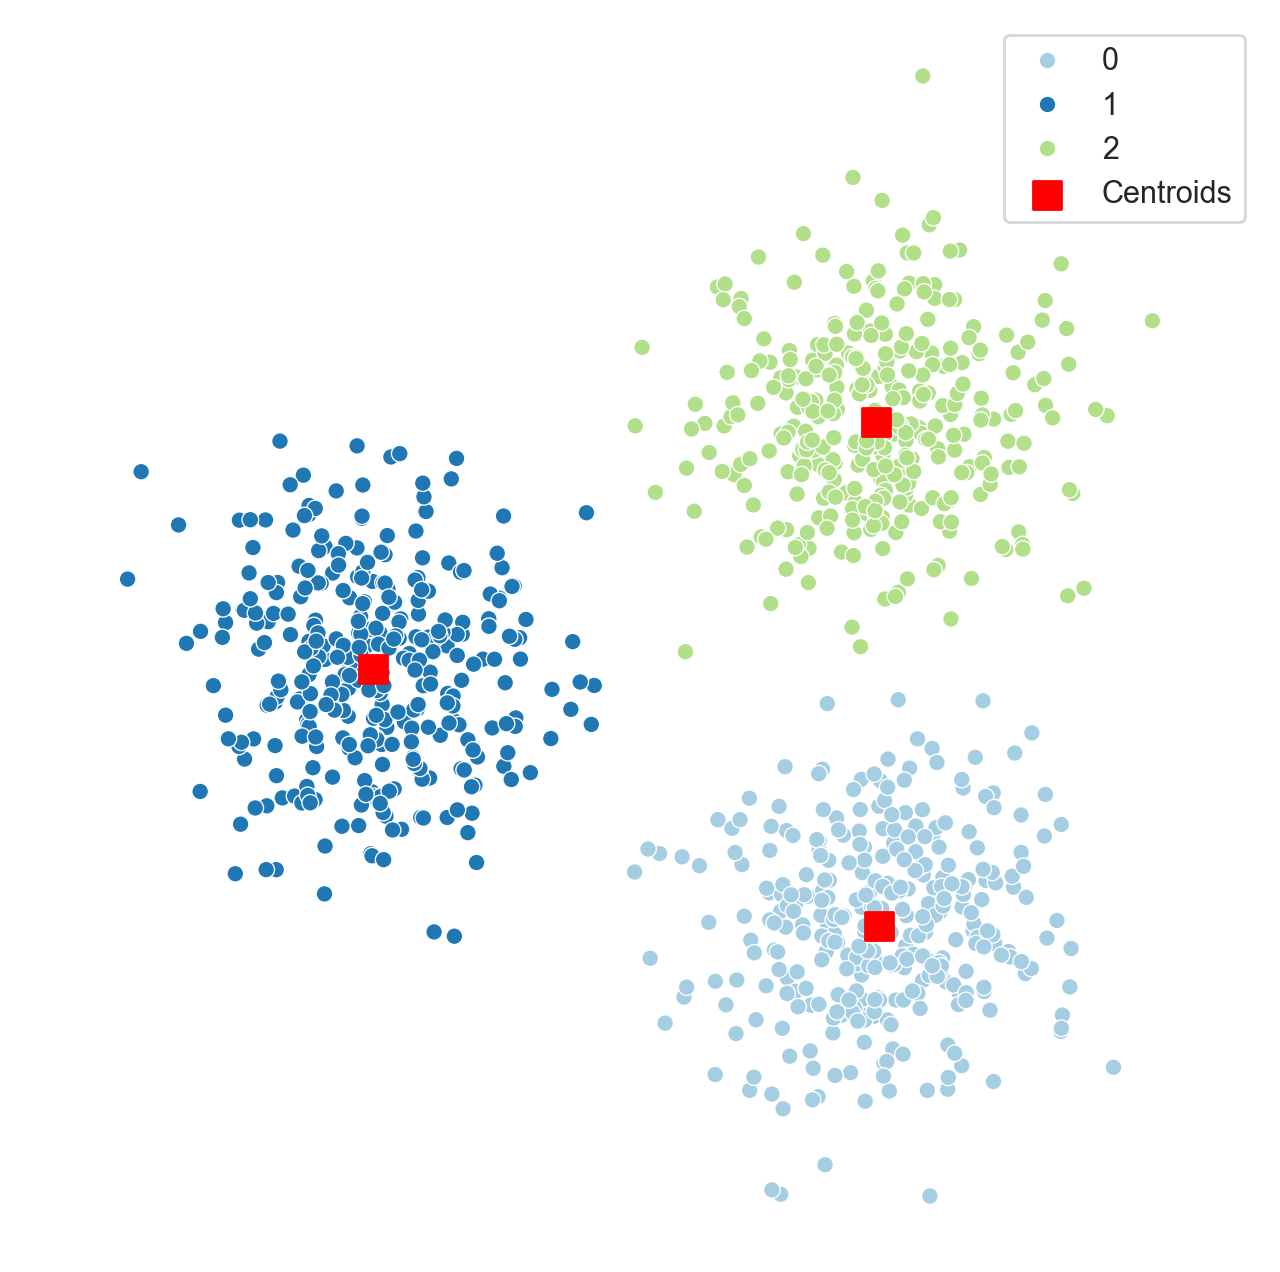

In [10]:
# instantiate MyKMeans Object
km = MyKMeans(k=3)
# Get out the membership array
labels = km.fit(points)

plot_cluster(data_KMeans, km)

<!-- BEGIN QUESTION -->

## Question 2.3 Effects of Centroid Initialization
Take a look at the K-Mean cluster. 

![initialization](imgs/initialization.png)

What is the differences between the clusters in the left and the clusters in the right? In what ways does the initialization of the centroids affect the clusters we got?


_Points:_ 0.4

The clusters on the left are well defined, with all the points assigned to the correct clusters. By contrast, the clusters on the right are not ideal: many points are clustered incorrectly, resulting in some clusters being big and with high variance, and others being small and with lower variance. This difference is due to the initialization of the cluster centroids: if the 3 means are initialized in the 3 different clusters, k means will run smoothly; but if 2 or more means are initialized in the same cluster, they algorithm will not perform well, as the centroid can't 'move' to the correct cluster (the points are too far).

<!-- END QUESTION -->

### Question 2.4.1 Distortion Measures

Given the `points` and `centroids` of the dataset, calculate the distortion measure given by this formula, and return that value. Remember, the distortion measure is given by:

$$
J = \sum_{n=1}^N\sum_{k=1}^Kr_{nk} ||x_n-\mu_k||^2
$$

_Points:_ 0.4

In [11]:
def distortion_measure(
        points: np.ndarray, centroids: np.ndarray
    ) -> float:
    """
    Given the points and the centroids, calculate the 
    distortion measure this set of clusters.
    
    points: 2d numpy array containing the points
    centroids: 2d numpy array containing the centroids
    """
    km = MyKMeans(k=len(centroids))
    km.data = points
    km.centroids = centroids
    km.E_step()
    membership = km.membership
    J = 0
    for i in range(len(centroids)):
        cluster_points = points[membership == i]
        temp = np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1))

        J+=temp
    return J

In [13]:
grader.check("241_distortion_measures")

241_distortion_measures results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 2.4.2 Choose the Right K

In real world scenarios, we as data scientists oftentimes do not have access to the knowledge of the true $k$ in the data generating process. Therefore, in this section, we explore how to choose the right value of the $k$ to achieve the desired clusters.

In [14]:
# Fit K-Means on different values of k
costs = []
for k in range(1, 9):
    # instantiate KMeans Object
    km = MyKMeans(k=k)
    # Get out the membership array
    labels = km.fit(points)
    costs.append(distortion_measure(points, km.centroids))

Text(0.5, 1.0, 'Distortion Measures of each $k$ values')

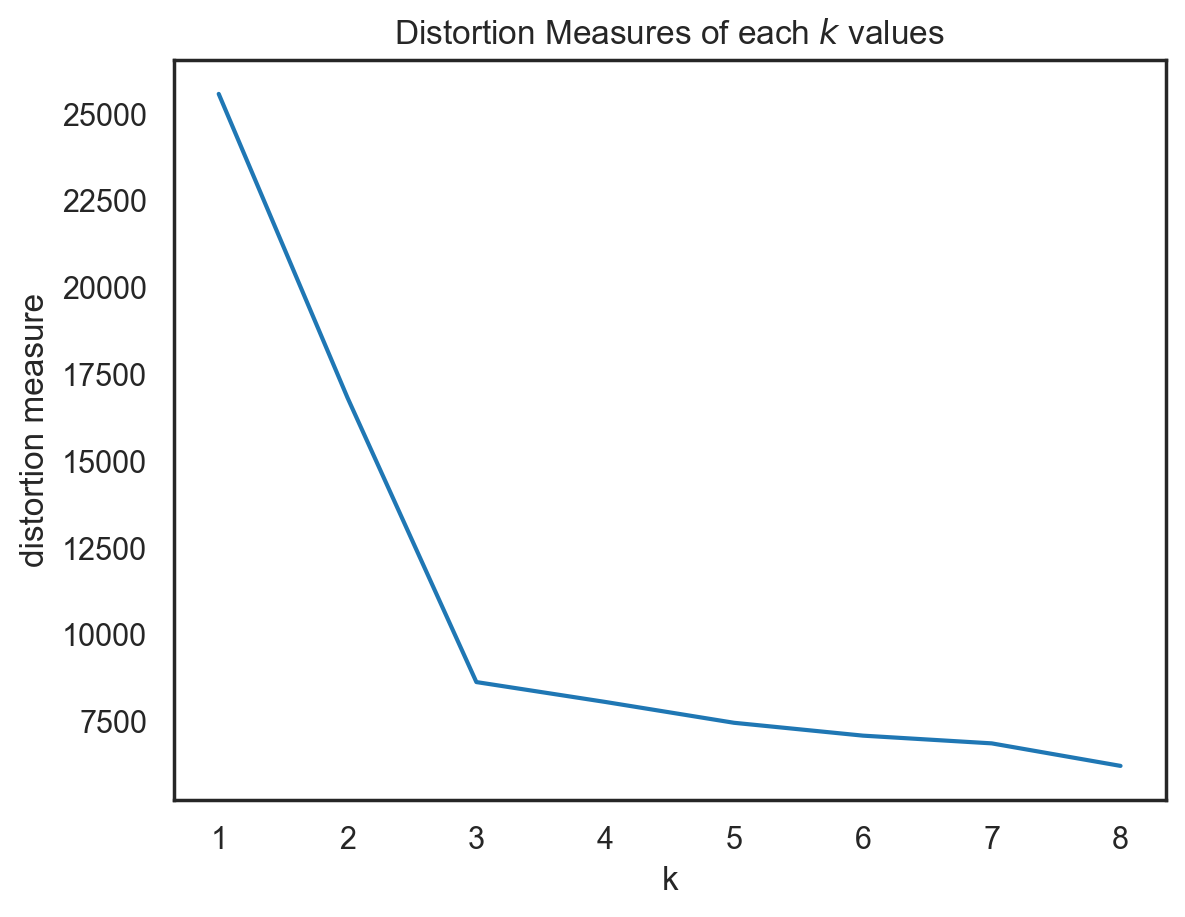

In [15]:
# Visualize the Distortion Measure.
plt.plot(range(1, 9), costs)
plt.xlabel("k")
plt.ylabel("distortion measure")
plt.title("Distortion Measures of each $k$ values")

If your implementations is sound, you should have a plot looks like this.

<img src="imgs/distortion.png" alt="distortion" width="600"/>


Which is the right K to choose? And why?

_Points:_ 0.2

The right value for k is 3; this is clear from the plot, which shows an elbow at k=3. This means that, at higher values of k (k=4, k=5 etc.), the distortion measure does not decrease significantly. Hence the optimal choice for k is 3.

<!-- END QUESTION -->

## Q3 K-Means with scikit-learn (1 Point)

### Q3.1 K-means on MNIST

Let's explore doing a more realistic clustering task with K-means.  MNIST is a dataset of digits scanned from zip codes of snail mail letters. This particular version is reduced size... fewer samples (<1800 vs 70k), fewer grayscale values (16 vs 255) and downscaled (8x8 pixels vs 64x64 pixels).

# digits: 10; # samples: 1797; # features 64


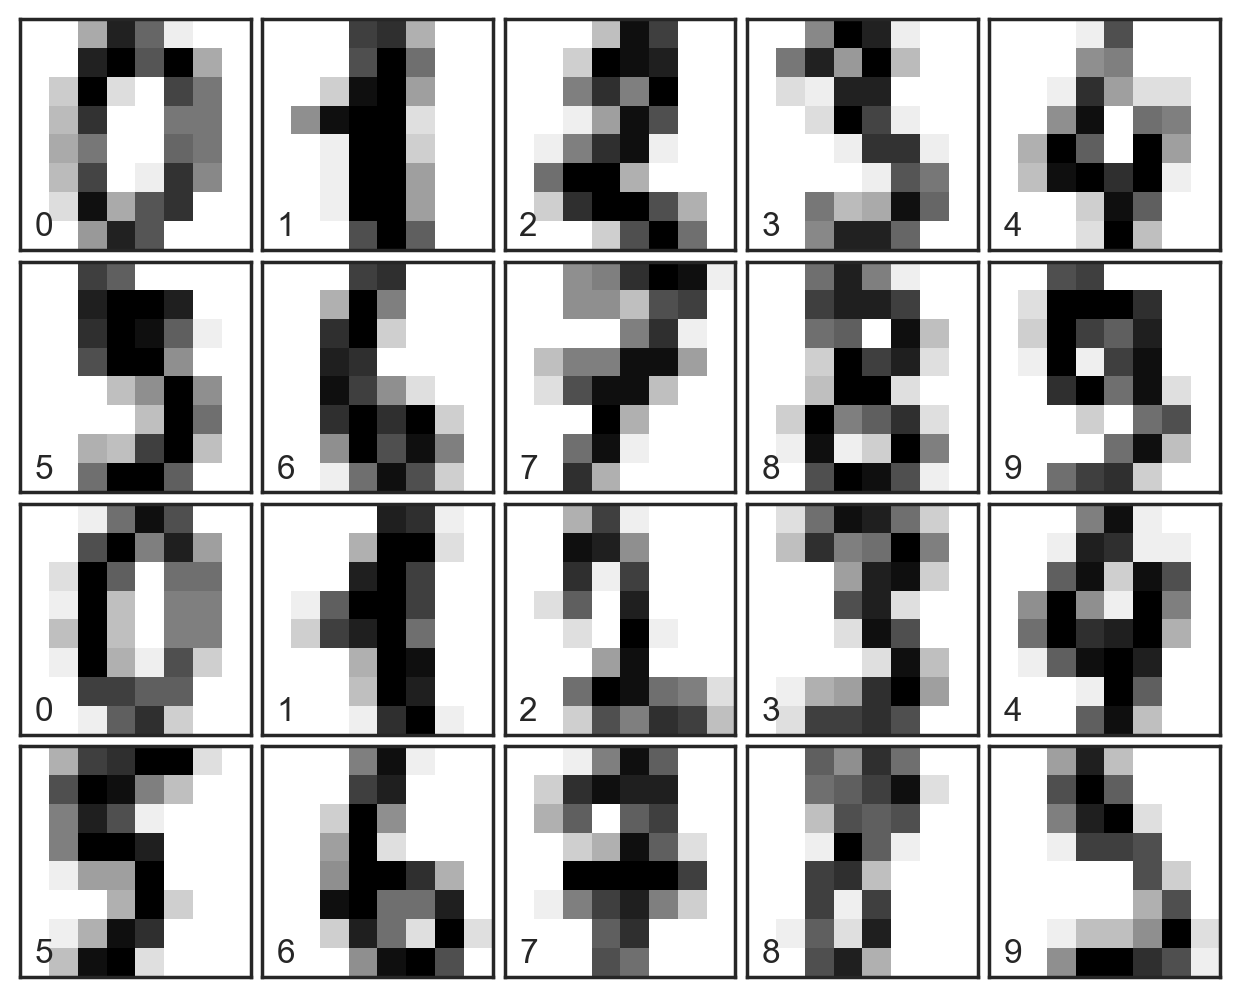

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn.cluster import KMeans

data_MNIST, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data_MNIST.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# heres a sample of 20 images to help you visualize just how ugly this level of downscaling/sampling is
for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    # data is 28 x 28 pixels, grayscale
    ax.imshow(data_MNIST[i].reshape(8,8), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the true target value in the lower left corner
    ax.text(0, 7, str(labels[i]))

In the cell below please do the following, in the following order:
1. Create a KMeans instance with 10 clusters, plus the following arguments `init="k-means++", n_init=4, random_state=777`
1. Fit the KMeans with `data_MNIST`
1. Create a pandas DataFrame called `kmm_pred` with the following two columns: 
    - 'true': which contains the true categories of each datapoint, the variable `labels` we already loaded 
    - 'pred': the predicted clustering of `data` from the fitted Kmeans
    - NOTE: you MUST use exactly the column names in single quotes above
1. Calculate the Rand score for the clustering, and store the value in a variable called `kmeans_rand`. NOTE: you need to pay attention to the order of arguments to this function, if you reverse them you may get a wrong answer.
1. Calculate the Adjusted Rand score for the clustering, and store the value in a variable called `kmeans_adj_rand`. 


Use the scikit-learn docs to help you!



_Points:_ 0.4

In [17]:
kmeans = KMeans(n_clusters=10, init='k-means++', n_init=4, random_state=777)
kmeans.fit(data_MNIST)
kmeans_pred = pd.DataFrame()
kmeans_pred['true'] = labels
kmeans_pred['pred'] = kmeans.labels_
kmeans_rand = rand_score(labels, kmeans.labels_)
kmeans_adjusted_rand = adjusted_rand_score(labels, kmeans.labels_)

print(kmeans_rand, kmeans_adjusted_rand)

0.9204799387248979 0.596907083127223


In [18]:
grader.check("3_1_k_means_sklearn")

3_1_k_means_sklearn results: All test cases passed!

<!-- BEGIN QUESTION -->

### Q3.2 Interpret the result
The next two cells have visualizations that you can do to see what is going on with the predicted clusters and how they relate to the true labels and vice versa.  Take a look.

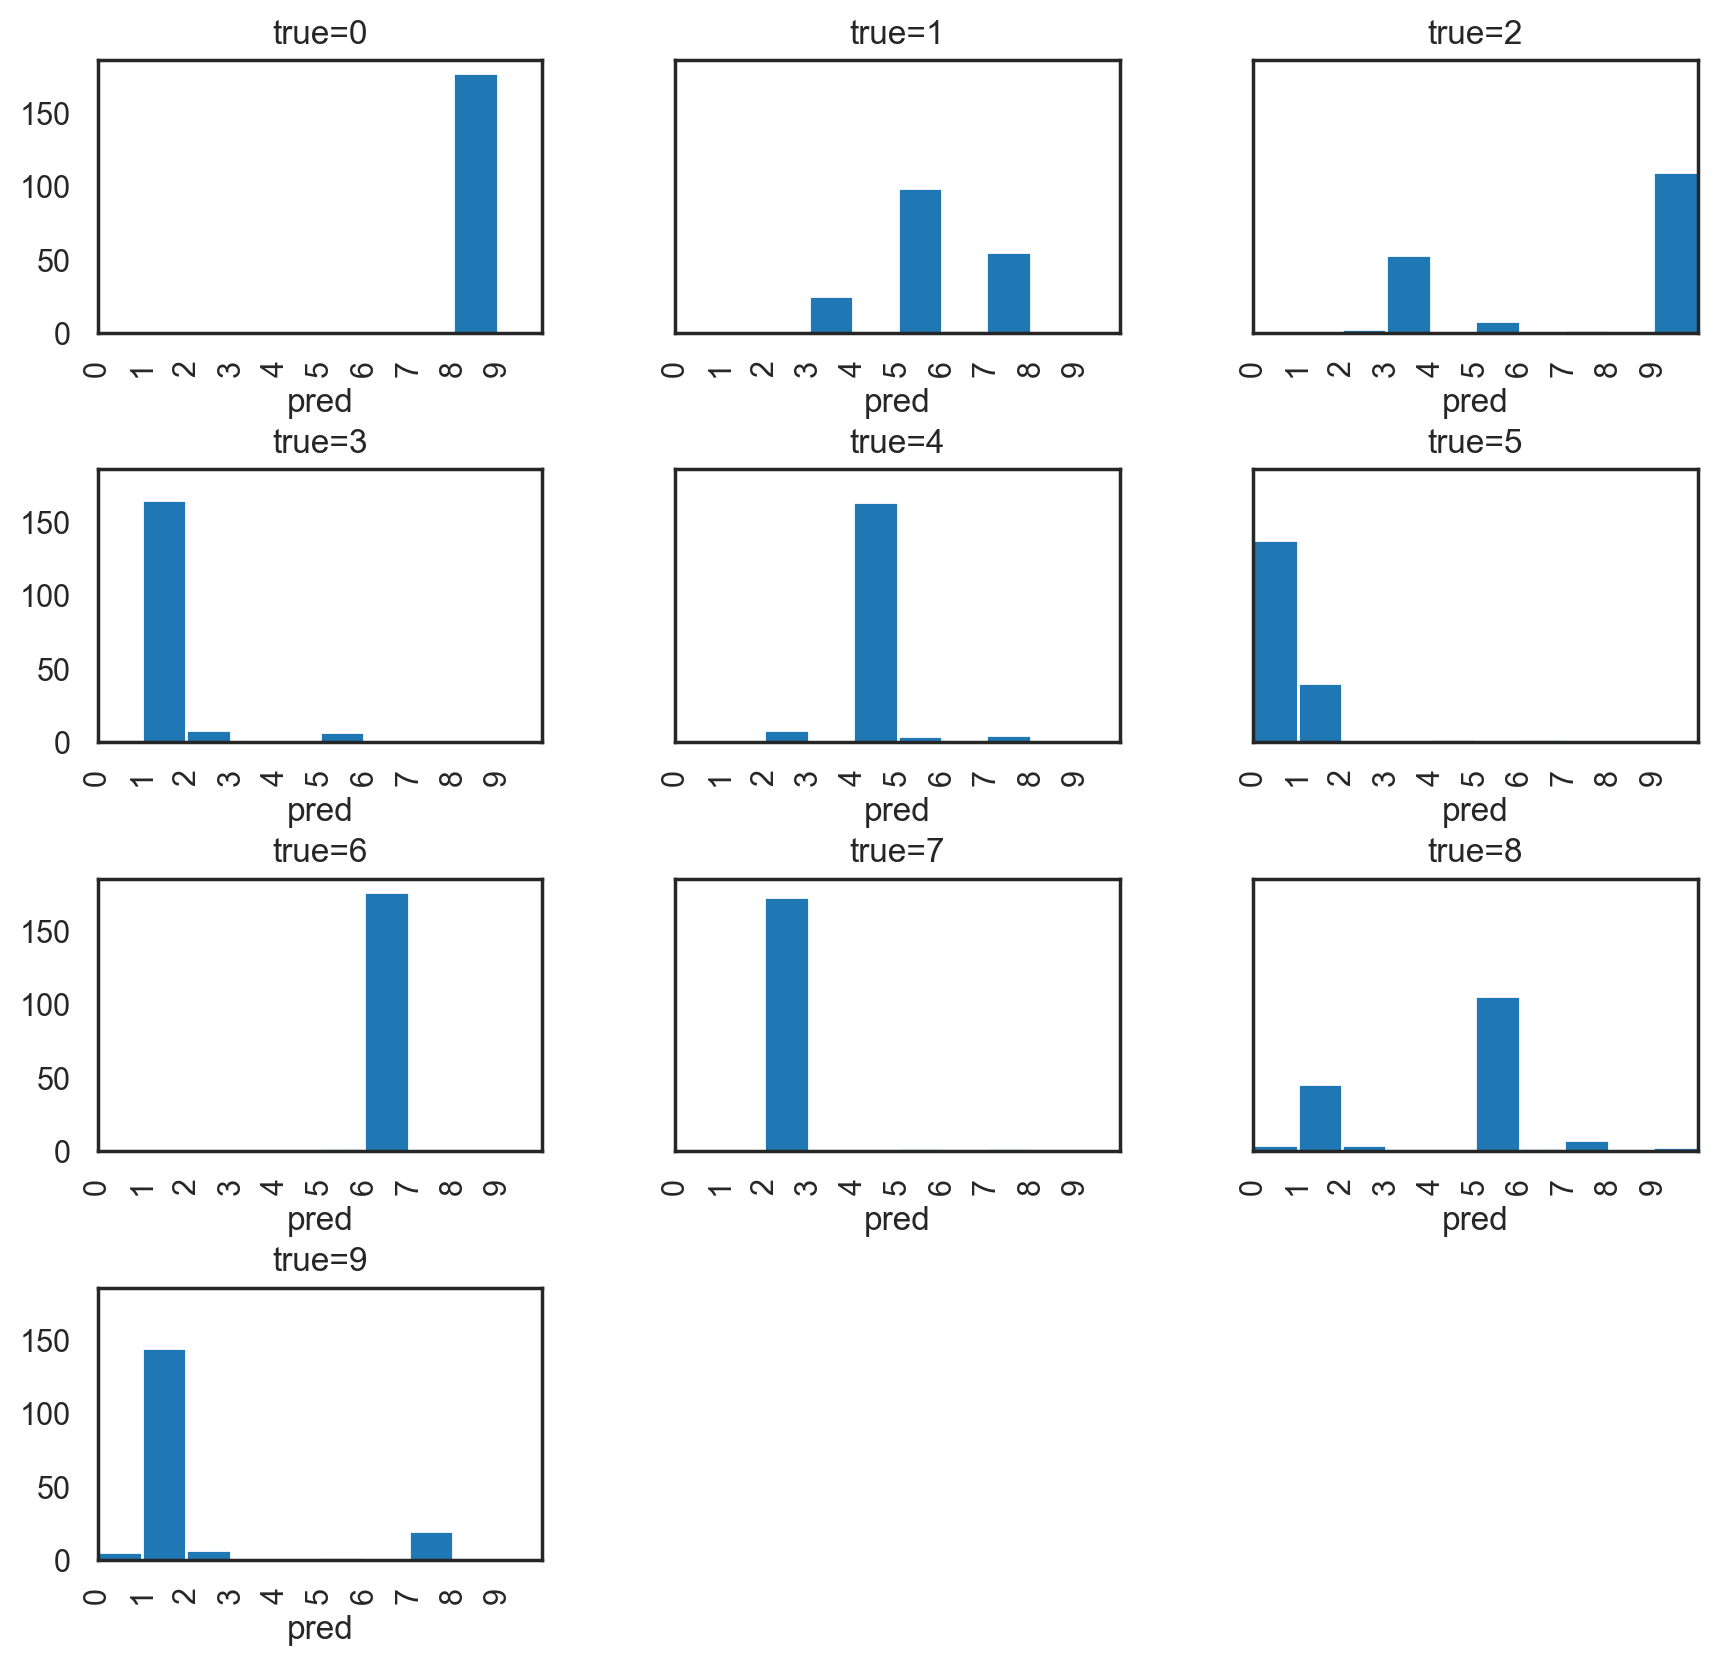

In [19]:
axs=kmeans_pred.hist(column='pred',by='true',sharey=True, figsize=(10,10), bins=range(11));
for ax in axs.ravel():
    ax.set_xlim((0,10))
    ax.set_xticks(range(10))
    old=ax.get_title()
    ax.set_title('true='+old)
    ax.set_xlabel('pred')

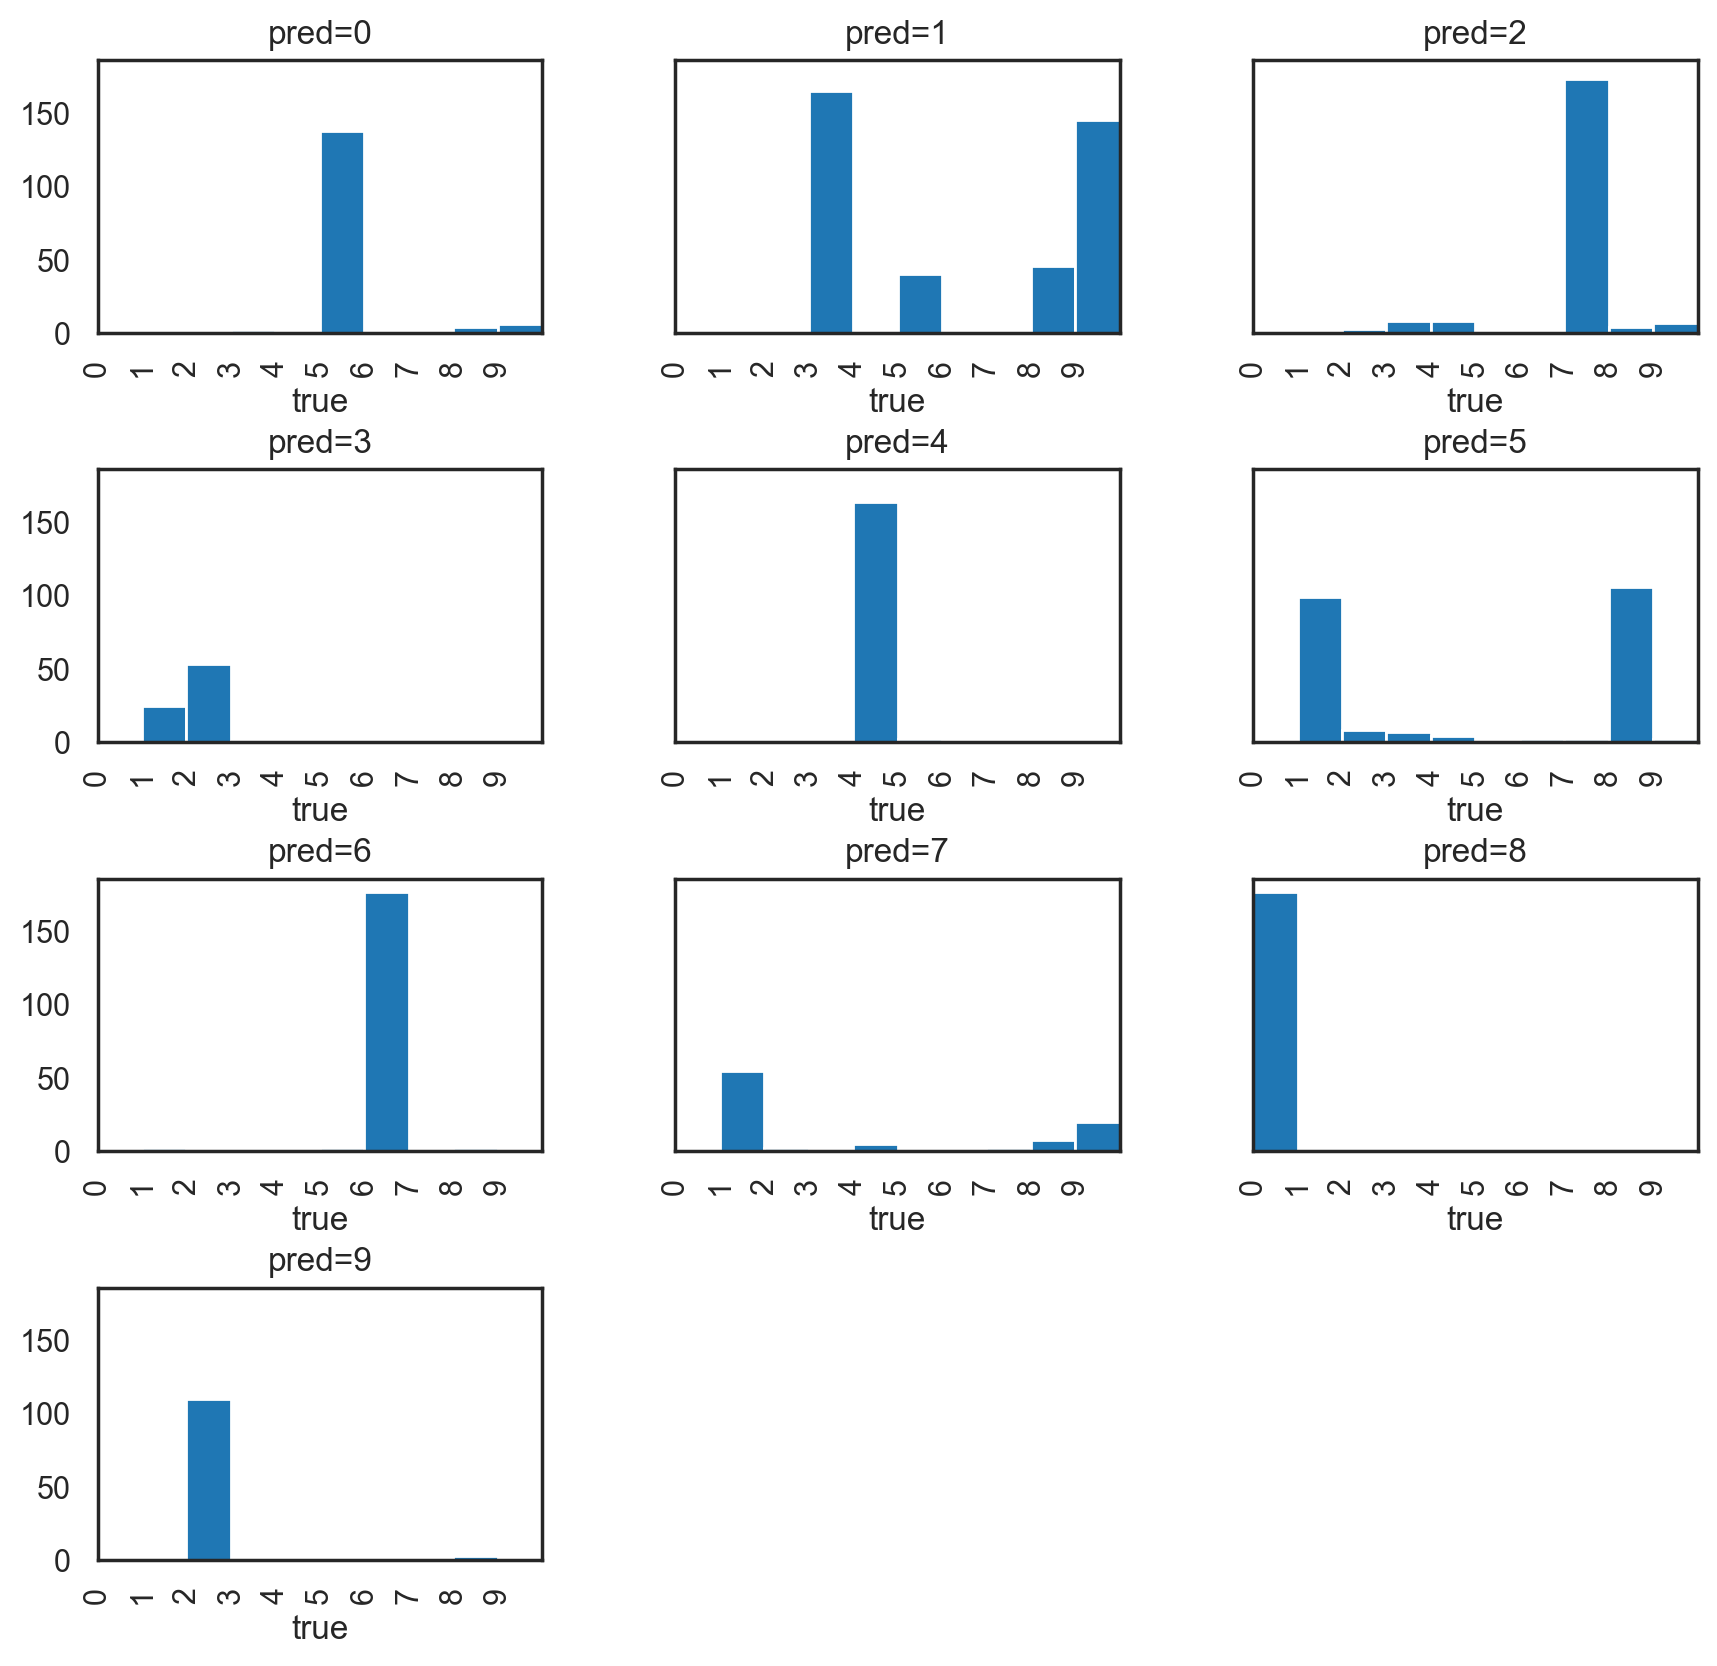

In [20]:
axs=kmeans_pred.hist(column='true',by='pred',sharey=True, figsize=(10,10), bins=range(11));
for ax in axs.ravel():
    ax.set_xlim((0,10))
    ax.set_xticks(range(10))
    old=ax.get_title()
    ax.set_title('pred='+old)
    ax.set_xlabel('true')

OK, now in the next cell discuss your results above.  

Please give us some insights... think deeply about the plots and empirical results in light of what you know about the clustering method, the metrics, and the visualizations.  If you just copy/paste some definitions and say "yes/no" you will not be getting full points.

1. Describe what Rand score and Adjusted Rand score are. I suggest you look at the Wikipedia page as well as the scikit-learn docs.  Describe the difference between the metrics. Interpret the numbers you got for Rand vs Adjusted Rand in light of what the difference is in the metrics. 
1. Do you think that the clustering produced by KMeans is any good for predicting the true label?  Why or why not... please include evidence from the viz and the scores above.
1. Regardless of what you said about the prediction above, do you think that the clustering can tell you anything about the data... like are there particular true labels that are MORE likely to be confused with others? What else might we learn from the clustering?

_Points:_ 0.6

1. The Rand Index is defined as $R=\frac{a+b}{a+b+c+d}$. It is a metric used to compare 2 partitions ($X \text{and } Y$) of the same set of elements. The index can be interpreted as the number of agreement between $X$ and $Y (a+b)$, over the the total number of predictions ($a+b+c+d$, where $c+d$ is the number of disagreements between $X$ and $Y$). Some agreements, however, can be due to chance alone. The adjusted Rand Index is a modified version of the Rand Index which takes into account this possibility. It is defined as $AR = \frac{R-E[R]}{max(R)-E[R]}$, where $R$ is the Random Index and $E$ is the expectation. After comparing the true cluster labels to the KMeans clusters, I obtained R = 0.9204799387248979 and AR = 0.596907083127223. The adjusted score is much lower than the unadjusted Rand Index, suggesting that a percentage of the agreements between the true labels and the KMeans-assigned labels is due to chance alone.     

2. the KMeans algorithm is not good at predicting the true label for hand-written digits: the KMeans-generated clusters are not an accurate representation of the true labels. This is evident from the adjusted Rand Index (comparison of true and predicted labels) of 0.597. Meaning, on average, KMeans assigns a point to the correct cluster 59% of the time. The plots are also insightful: for example, 0 gets misclassified by KMeans into 8.      

3. KMeans works best with distinct clusters that have similar variance. In the case of hand-written digits, many clusters overlap, as some digits are especially similar to one another (for example 0 and 8, 1 and 7). These are the hardest classifications for KMeans, which the algorithm often gets wrong. Some digits, however, have a characteristic shape which makes them separable form the others. 6 and 4 are two examples of digits that KMeans clusters successfully.

<!-- END QUESTION -->

# Q4 Gaussian Mixture Model (GMM) (3.5 Points)

In [21]:
# Helper function
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='Set3')
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    
    if gmm.covariance_type=='diag':
        fullc = np.array([ np.diag(x) for x in gmm.covariances_])
    elif gmm.covariance_type=='spherical':
        fullc = np.array([ np.diag([x, x]) for x in gmm.covariances_])
    elif gmm.covariance_type=='tied':
        fullc = np.array( gmm.n_components*[gmm.covariances_])
    elif gmm.covariance_type=='full':
        fullc = gmm.covariances_
    else:
        raise NotImplemented
        
    for pos, covar, w in zip(gmm.means_, fullc, gmm.weights_):
        alph = np.max([w*w_factor, 0.05])
        draw_ellipse(pos, covar, ax=ax, alpha=alph)

#### New Dataset
In the following problems, you will implement you own version of Gaussian Mixture Model. But first, you will use the K-means you implemented in Q1 on a new dataset generated in the following cell. The new data are stored in the variable `X_gmm`.

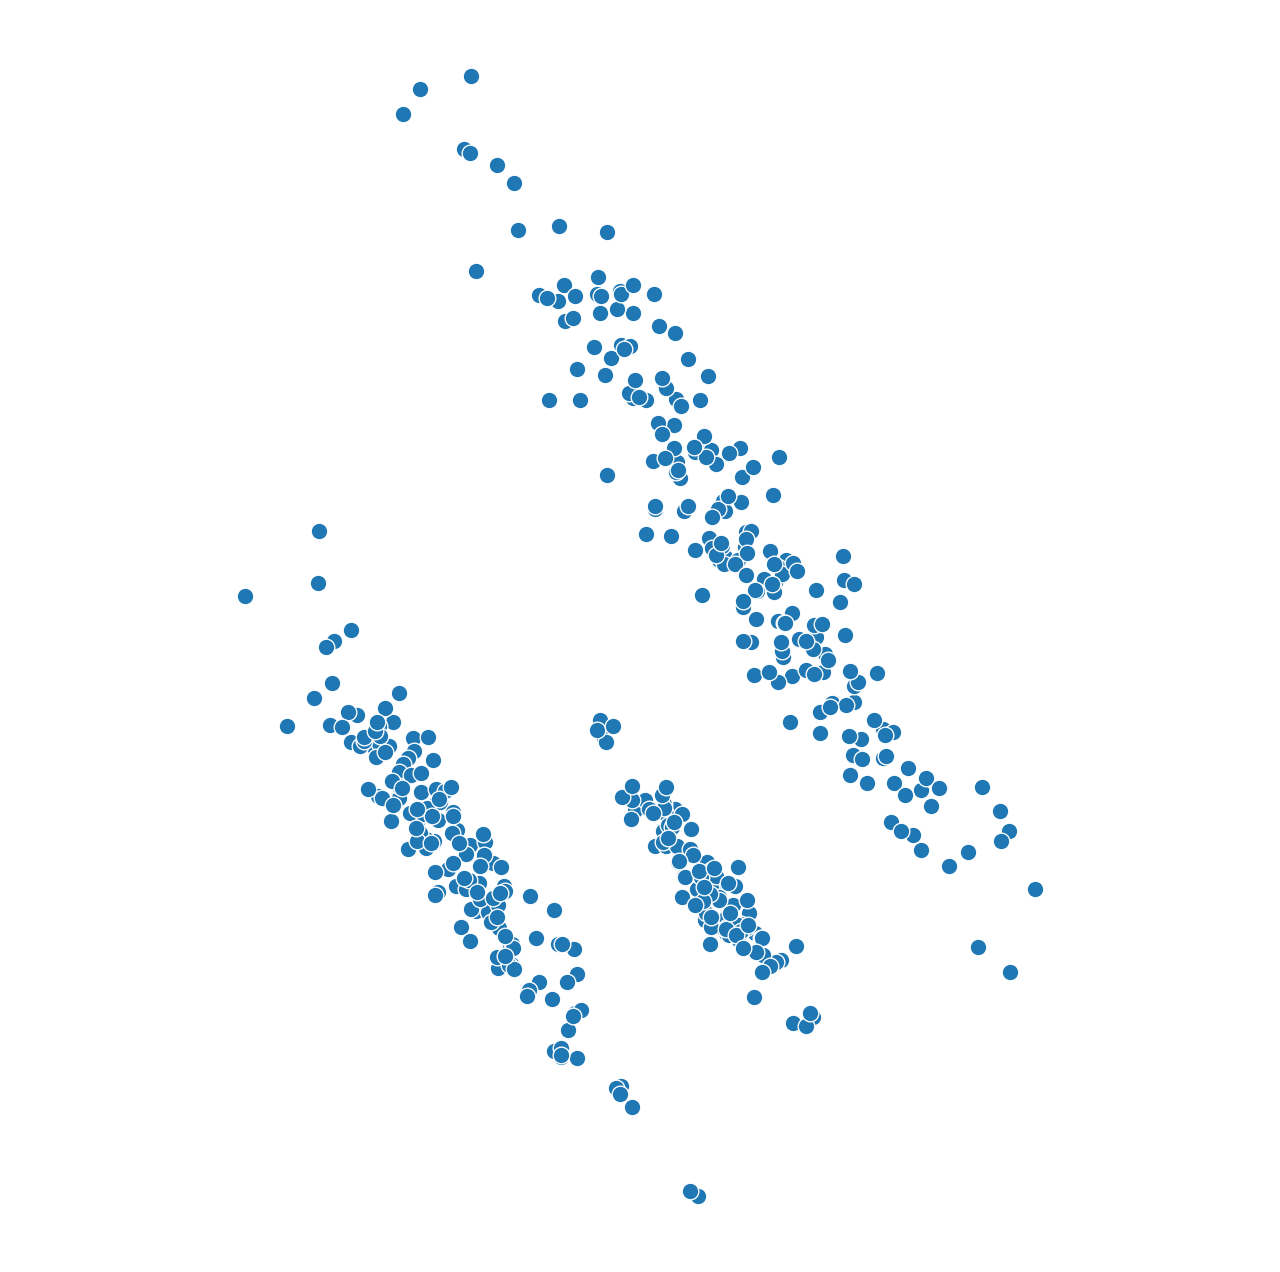

In [22]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X, y_gmm = make_blobs(
    n_samples=[150, 100, 200], cluster_std=[1, 0.6, 1.5], centers=[[-1,-1],[6,4],[12,12]], random_state=42
)
X_gmm = np.dot(X, transformation)  # Anisotropic blobs
data = pd.DataFrame(X_gmm,columns=['x','y'])
plot_cluster(data)

## Q4.1 Apply the K-means you implemented 

Use the K-means class you implemented in the Q1 to model the new dataset stored in `X_gmm`.

_Points:_ 0.3

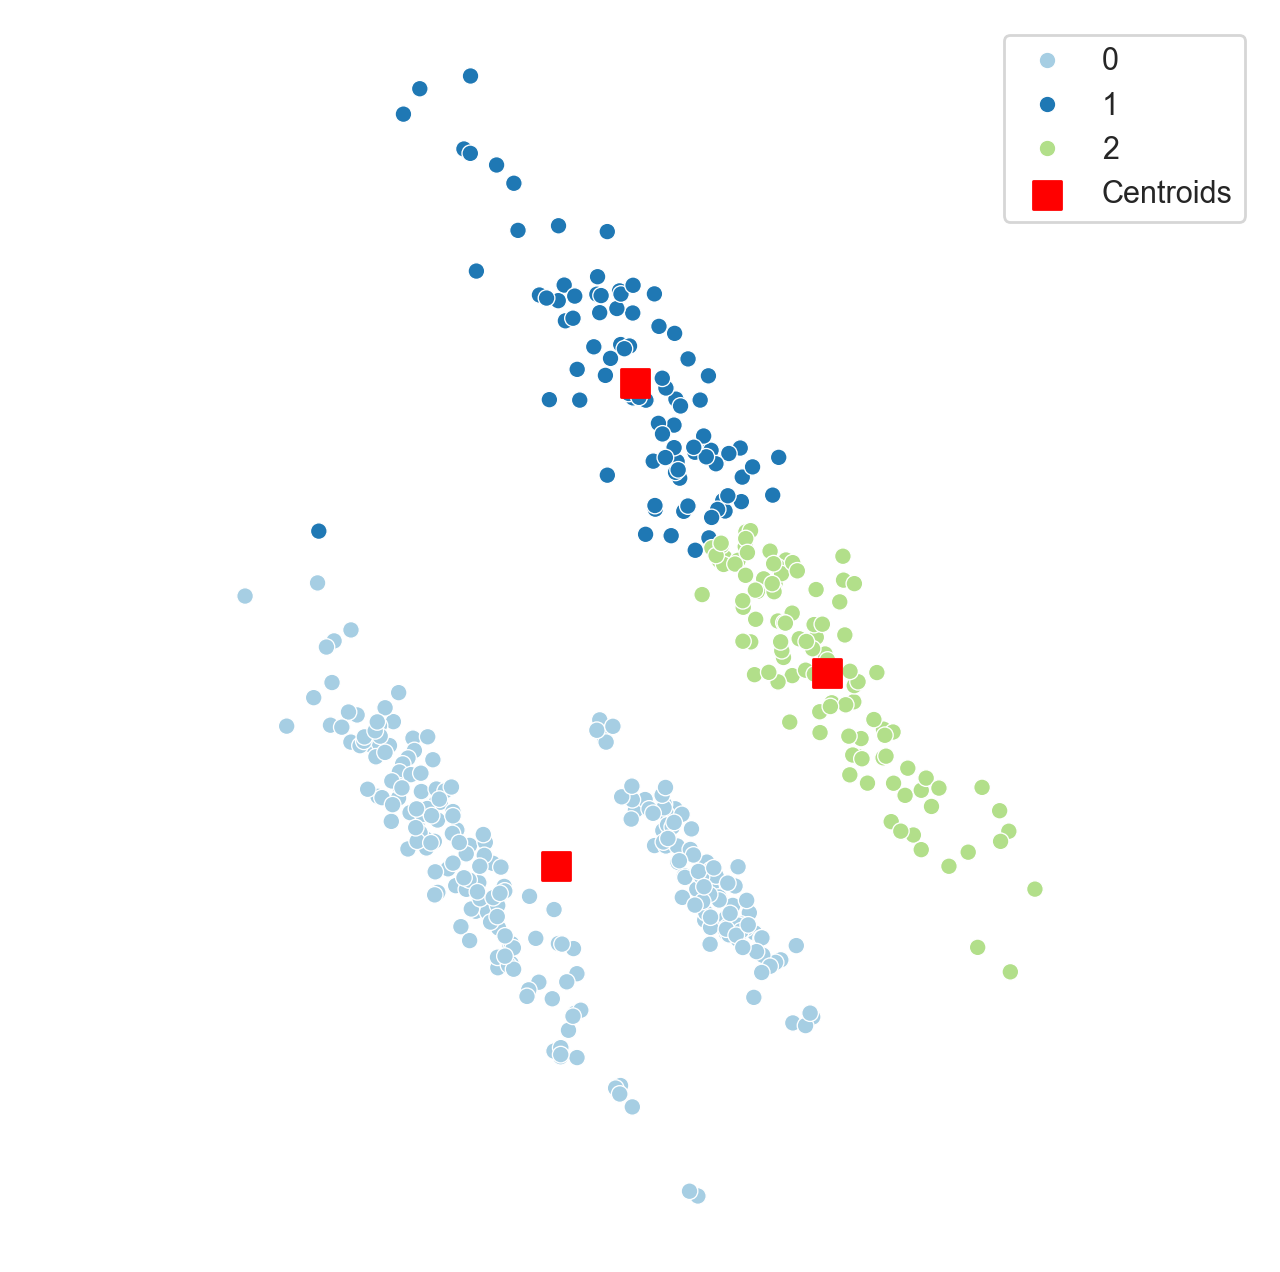

In [91]:
data = pd.DataFrame(X_gmm,columns=['x','y'])

# instantiate KMeans Object
km = MyKMeans(k = 3)
# Get out the membership array
labels = km.fit(X_gmm)


plot_cluster(data, km)

In [24]:
grader.check("41_k_means_new_data")

41_k_means_new_data results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q4.2 Interpret the results of K-means from Q3.1
According to the result of Q3.1, does K-means fit well to this new dataset? Why or why not? Explain.

_Points:_ 0.6

KMeans does not fit well to the new dataset because the clusters are not compact and they have very diverse variance.

<!-- END QUESTION -->

### Gaussian Mixture Model
Gaussian Mixture Models (GMMs) are probabilistic models that assume data is generated from a mixture of $K$ Gaussian distributions, each with its own parameters: mean($\mu_k$) and covariance($\Sigma_k$). They are commonly used in clustering and density estimation, as they can flexibly capture the presence of multiple subpopulations within a dataset. 
$$p(\text{x}) = \sum_{k=1}^K \pi_k \mathcal{N}(\text{x}|\mu_k, \Sigma_k)$$
where $\pi_k$(mixing coefficients) can be interpreted as proportion of data in clutser $k$ and 
$$\sum_{k=1}^K \pi_k = 1$$
Another quantity that will play an important role is the *responsibility* conditoinal probability of $z_k$ given $x_n$, denoted as:
$$\gamma(z_{nk}) = \frac{\pi_k \mathcal{N}(\text{x}_n|\mu_k, \Sigma_k)}{\sum_{j=1}^{\text{K}}\pi_j \mathcal{N}(\text{x}_n|\mu_j, \Sigma_j)}$$
And $\gamma{z_{nk}}$ can be viewed as the responsibility that cluster $k$ takes for explaning the obsevation $x_n$

#### Algorithm Pseudocode
Given a Gaussian Mixture Model, the goal is to maximize the log likelihood function with respect to the parameters(comprising the means($\mu_k$), covariances($\Sigma_k$) of the clusters, and the mixing coefficients($\pi_k$))
$$\arg\max_{\pi, \mu, \Sigma} \ln p(\text{X}|\pi, \mu, \Sigma) = \sum_{n=1}^N\ln\biggl\{\sum_{k=1}^K \pi_k \mathcal{N}(\text{x}|\mu_k, \Sigma_k)\biggl\}$$

1. Initialize parameters $\mu$, $\Sigma$ and $\pi$
2. Repeat for some number of iterations or until converged:
    1. Keep the parameters fixed, evaluate the responsibilities $\gamma$. **(E-Step)**
    2. Keep the responsibilities($\gamma$) fixed, update the parameters $\pi, \mu, \Sigma$ **(M-Step)**
  
You are provided with the skeleton codes for Gaussian Mixture Model and you will implement the E-step and M-step.

In [25]:
class GMModel():
    
    def __init__(self, X, k, max_iters):
        """
        This function initializes our parameters (mu, pi and sigma) and plots our data points.
        """
        self.X = X # Data
        self.k = k # Number of cluster/latents
        self.max_iters = max_iters
        self.dim = self.X.shape[1] # Equals 2, as we are considering 2D points
        self.N = self.X.shape[0] # Equals the number of points in the dataset
        """
        Here we initialize mu, pi, sigma and gamma.
        """
        self.mu = np.copy(X[np.random.choice(self.N, self.k, False), :]) # Shape: k x dim
        self.pi =  np.ones(self.k)/self.k # Shape: k
        self.sigma = np.array([5.0 * np.identity(self.dim) for i in range(self.k)]) # Shape: k x dim x dim
        self.gamma = np.zeros((self.N, self.k)) # Shape: N x k (used in E-step and M-step)
        """
        The following part is used for plotting
        """
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T

    def plot_gmm_data(self, title, colors=None):
        """
        This function creates a scatter plot of all the data points. It also creates a contour plot of the probability 
        distributions of each of the clusters (specified by mu, pi and sigma)
        """
        fig = plt.figure(figsize=(6,6))
        ax0 = fig.add_subplot(111)
        # ax0.scatter(self.X[:,0], self.X[:,1], c=colors)
        data = pd.DataFrame(self.X,columns=['x','y'])
        sns.scatterplot(data=data,x='x',y='y',ax=ax0, hue=colors)
        ax0.set_title(title)
        ax0.axis('equal')
        ax0.axis(xmin=-4,xmax=8)
        ax0.axis(ymin=-4,ymax=8)
        for m,c in zip(self.mu,self.sigma):
            # c += self.sigma_correction
            multi_normal = multivariate_normal(mean=m,cov=c)
            # ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            draw_ellipse(m, c, ax=None, alpha=0.08)
            ax0.scatter(m[0],m[1],c='r',zorder=10,s=30, marker=",")
        # ax0.legend()
        # return fig

    def fit(self, graph=True, disable=False):
        if graph:
            self.plot_gmm_data('Initial State')
        for i in tqdm(range(self.max_iters), disable=disable):
            self.expectation()
            self.maximization()
        if graph:
            color_labels = np.argmax(self.gamma, axis=1)
            self.plot_gmm_data('Final State', color_labels)
            plt.legend()

        return self.mu, self.sigma

## Q4.3 E-step of GMM?

What is the formula of the E-step of GMM? 

$$\gamma(z_{nk}) = \frac{\pi_k\mathcal{N}(\text{x}_n|\mu_k, \Sigma_k)}{\sum_{\mathcal{j}=1}^\mathcal{K}\mathcal{N}(\text{x}_n|\mu_j, \Sigma_j)}$$

_Points:_ 0.4

## Q4.4 Implement the E-step of GMM
Complete the `expectation` function of GMM based on the formula from Q3.3.

_Points:_ 0.6

In [43]:
def expectation(self):
    """
    Perform the E-Step of GMM. Update the responsibility based on the parameters.
    """
    for n in range(self.N):
        sum_all_clusters = 0
        for k in range(self.k):
            temp = (multivariate_normal.pdf(self.X[n], self.mu[k], self.sigma[k]))
            sum_all_clusters += temp
            self.gamma[n][k] = (self.pi[k] * temp)/sum_all_clusters

    return self.gamma

# assign this method to GMModel module    
GMModel.expectation = expectation

In [44]:
grader.check("44_gmm_e_step_implementation")

44_gmm_e_step_implementation results: All test cases passed!

## Q4.5 What is the formula of M-step of GMM?
Write down the formula for the M-step of GMM that updates the parameters of GMM. 

$$
\begin{aligned}
\mu_k^{\text{new}} &= \frac{1}{N_k} \sum_{n=1}^N \gamma(z_{nk}) x_n \\
\Sigma_k^{\text{new}} &= \frac{1}{N_k} \sum_{n=1}^N \gamma(z_{nk}) (x_n - \mu_k^{\text{new}})(x_n - \mu_k^{\text{new}})^T  \\
\pi_n^{\text{new}} &= \frac{N_k}{N} \\
\text{where }
N_k &= \sum_{n=1}^N \gamma(z_{nk})
\end{aligned}
$$

_Points:_ 0.5

## Q4.6 Implement M-step of GMM
Complete the `maximization` function based on the formula from Q3.5.

_Points:_ 0.6

In [85]:
def maximization(self):
        # self.X = X # Data
        # self.k = k # Number of cluster/latents
        # self.max_iters = max_iters
        # self.dim = self.X.shape[1] # Equals 2, as we are considering 2D points
        # self.N = self.X.shape[0] # Equals the number of points in the dataset
        # """
        # Here we initialize mu, pi, sigma and gamma.
        # """
        # self.mu = np.copy(X[np.random.choice(self.N, self.k, False), :]) # Shape: k x dim
        # self.pi =  np.ones(self.k)/self.k # Shape: k
        # self.sigma = np.array([5.0 * np.identity(self.dim) for i in range(self.k)]) # Shape: k x dim x dim
        # self.gamma = np.zeros((self.N, self.k)) # Shape: N x k (used in E-step and M-step)
    
    self.mu = np.zeros((self.k, self.dim))
    N_k = np.ones(self.k)

    for k in range(self.k):
        mu_temp = np.zeros(self.dim)
        for n in range(self.N):
            temp = self.gamma[n][k]
            N_k[k] += temp
            mu_temp += temp*self.X[n]
        self.mu[k] = mu_temp/N_k[k]
    
    # Update the sigma parameter
    self.sigma = np.zeros((self.k, self.dim, self.dim))
    for j in range(self.k):
        for i in range(self.N):
            c = self.X[i] - self.mu[j]
            self.sigma[j] += self.gamma[i,j] * np.outer(c,c)
        self.sigma[j] /= N_k[j]

GMModel.maximization = maximization

In [86]:
X_simple = np.array([[1, 1], [0, 0], [0, 1], [1, 0], [5, 5], [4, 5], [5, 4], [4, 4]])
a = GMModel(X_simple, k=1, max_iters=10)
GMModel.maximization(a)

In [87]:
grader.check("46_gmm_m_step_implementation")

46_gmm_m_step_implementation results:
    46_gmm_m_step_implementation - 1 result:
        ❌ Test case failed
        Trying:
            k = 1
        Expecting nothing
        ok
        Trying:
            X_simple = np.array([[1, 1], [0, 0], [0, 1], [1, 0], [5, 5], [4, 5], [5, 4], [4, 4]])
        Expecting nothing
        ok
        Trying:
            em = GMModel(X_simple, k, max_iters=100)
        Expecting nothing
        ok
        Trying:
            em.mu = np.array([[1, 1]])
        Expecting nothing
        ok
        Trying:
            assert callable(em.expectation)
        Expecting nothing
        ok
        Trying:
            assert callable(em.maximization)
        Expecting nothing
        ok
        Trying:
            _ = em.expectation()
        Expecting nothing
        ok
        Trying:
            em.maximization()
        Expecting nothing
        ok
        Trying:
            expected_mu = np.array([[2.5, 2.5]])
        Expecting nothing
        ok
        Trying:
            expected_sigma = np.array([[[4.25, 4.0], [4.0, 4.25]]])
        Expecting nothing
        ok
        Trying:
            assert np.allclose(em.mu, expected_mu)
        Expecting nothing
        **********************************************************************
        Line 11, in 46_gmm_m_step_implementation 0
        Failed example:
            assert np.allclose(em.mu, expected_mu)
        Exception raised:
            Traceback (most recent call last):
              File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest 46_gmm_m_step_implementation 0[10]>", line 1, in <module>
                assert np.allclose(em.mu, expected_mu)
            AssertionError
        Trying:
            assert np.allclose(em.sigma, expected_sigma)
        Expecting nothing
        **********************************************************************
        Line 12, in 46_gmm_m_step_implementation 0
        Failed example:
            assert np.allclose(em.sigma, expected_sigma)
        Exception raised:
            Traceback (most recent call last):
              File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest 46_gmm_m_step_implementation 0[11]>", line 1, in <module>
                assert np.allclose(em.sigma, expected_sigma)
            AssertionError

## Q4.7 Interpret the result
Comment on the result of GMM. How is it different from that of K-means you get from Q3.1

_Points:_ 0.5

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [01:32<00:00, 10.81it/s]


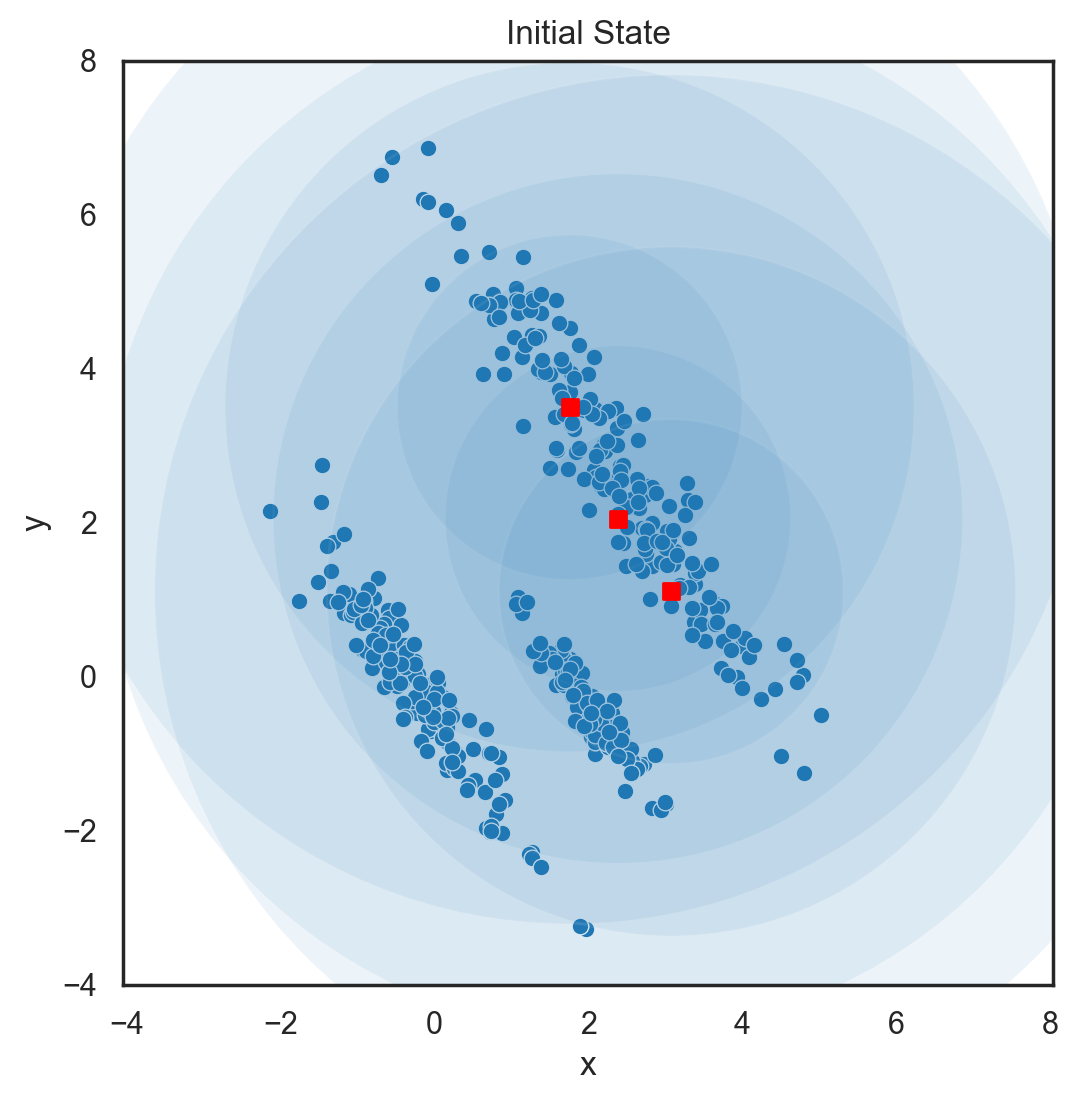

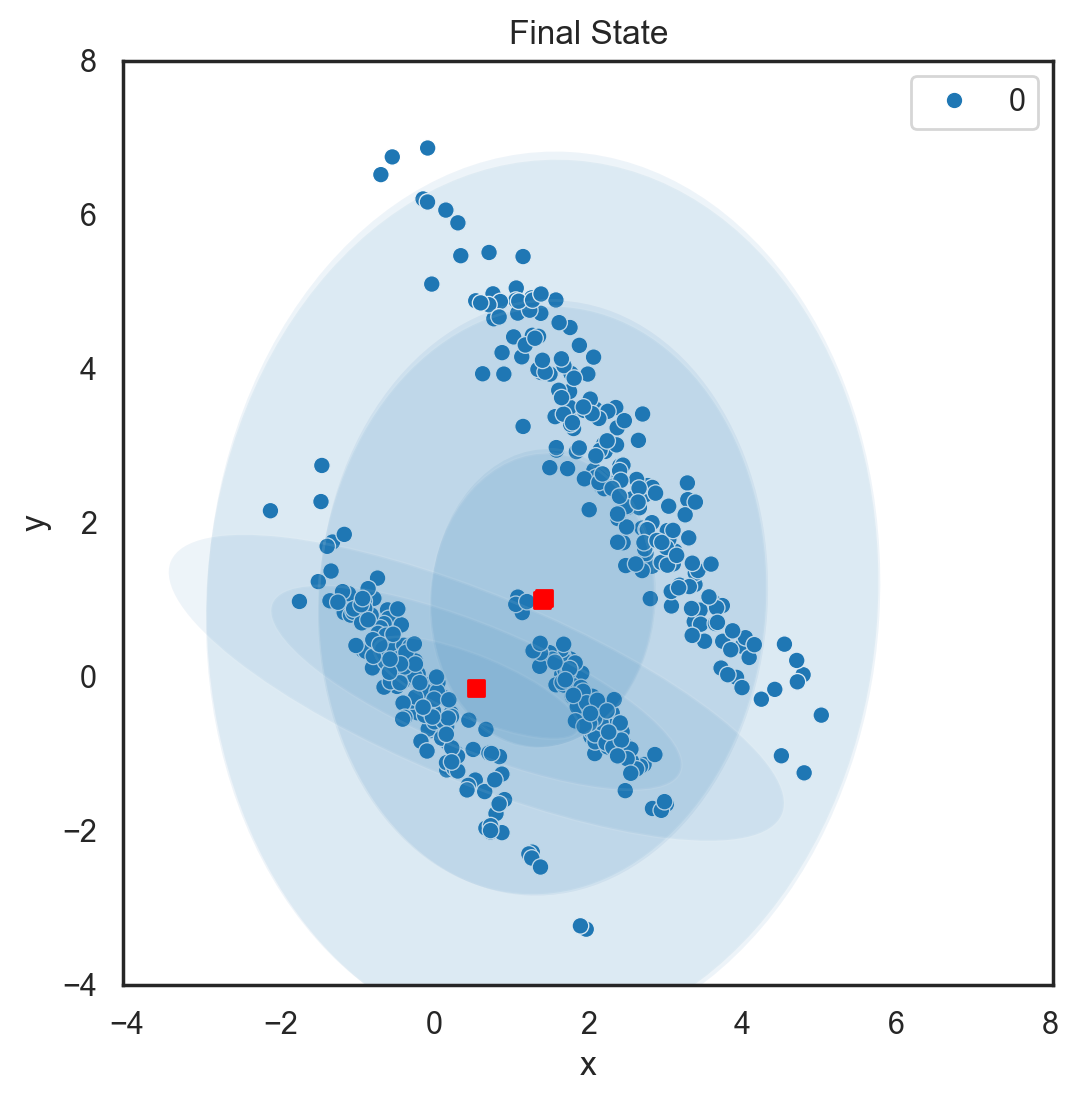

In [88]:
k = 3
max_iterations = 1000
em = GMModel(X_gmm, k, max_iterations)
em.mu = np.array([X_gmm[10], X_gmm[100], X_gmm[300]]) # set a fixed starting point
mu, sigma = em.fit()

# Q5: Gaussian Mixture Model with Scikit-Learn (1 Point)

Let's try to use the same MNIST dataset from before but use a Gaussian Mixture Model.

You are responsible for importing and using the correct class from scikit-learn.

## Q5.1 GMM on MNIST
In the cell below please do the following, in the following order:
- Create a Mixture of Gaussians with 10 components plus the following arguments: `random_state=777, covariance_type='tied'`
1. Fit the Mixture Model with `data`
1. Create a pandas DataFrame called `gmm_pred` with the following two columns: 
    - 'true': which contains the true categories of each datapoint, the variable `labels` we already loaded 
    - 'pred': the predicted clustering of `data` from the fitted mixture model
    - NOTE: you MUST use exactly the column names in single quotes above
1. Calculate the Rand score for the clustering, and store the value in a variable called `gmm_rand`. NOTE: you need to pay attention to the order of arguments to this function, if you reverse them you may get a wrong answer.
1. Calculate the Adjusted Rand score for the clustering, and store the value in a variable called `gmm_adj_rand`. NOTE: you need to pay attention to the order of arguments to this function, if you reverse them you may get a wrong answer.


_Points:_ 0.4

In [ ]:
data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=10, random_state=777, covariance_type='tied')
gmm.fit(data)
gmm_pred = pd.DataFrame()
gmm_pred['pred'] = gmm.predict(data)
gmm_pred['true'] = labels
gmm_rand = rand_score(gmm_pred['true'], gmm_pred['pred'])
gmm_adjusted_rand = adjusted_rand_score(gmm_pred['true'], gmm_pred['pred'])
print(gmm_rand, gmm_adjusted_rand)

0.9400845011420915 0.6801571843855635


In [ ]:
grader.check("51_gmm_mnist")

51_gmm_mnist results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q5.2 Interpret the GMM results
The next two cells have visualizations that you can do to see what is going on with the predicted clusters and how they relate to the true labels and vice versa.  Take a look.

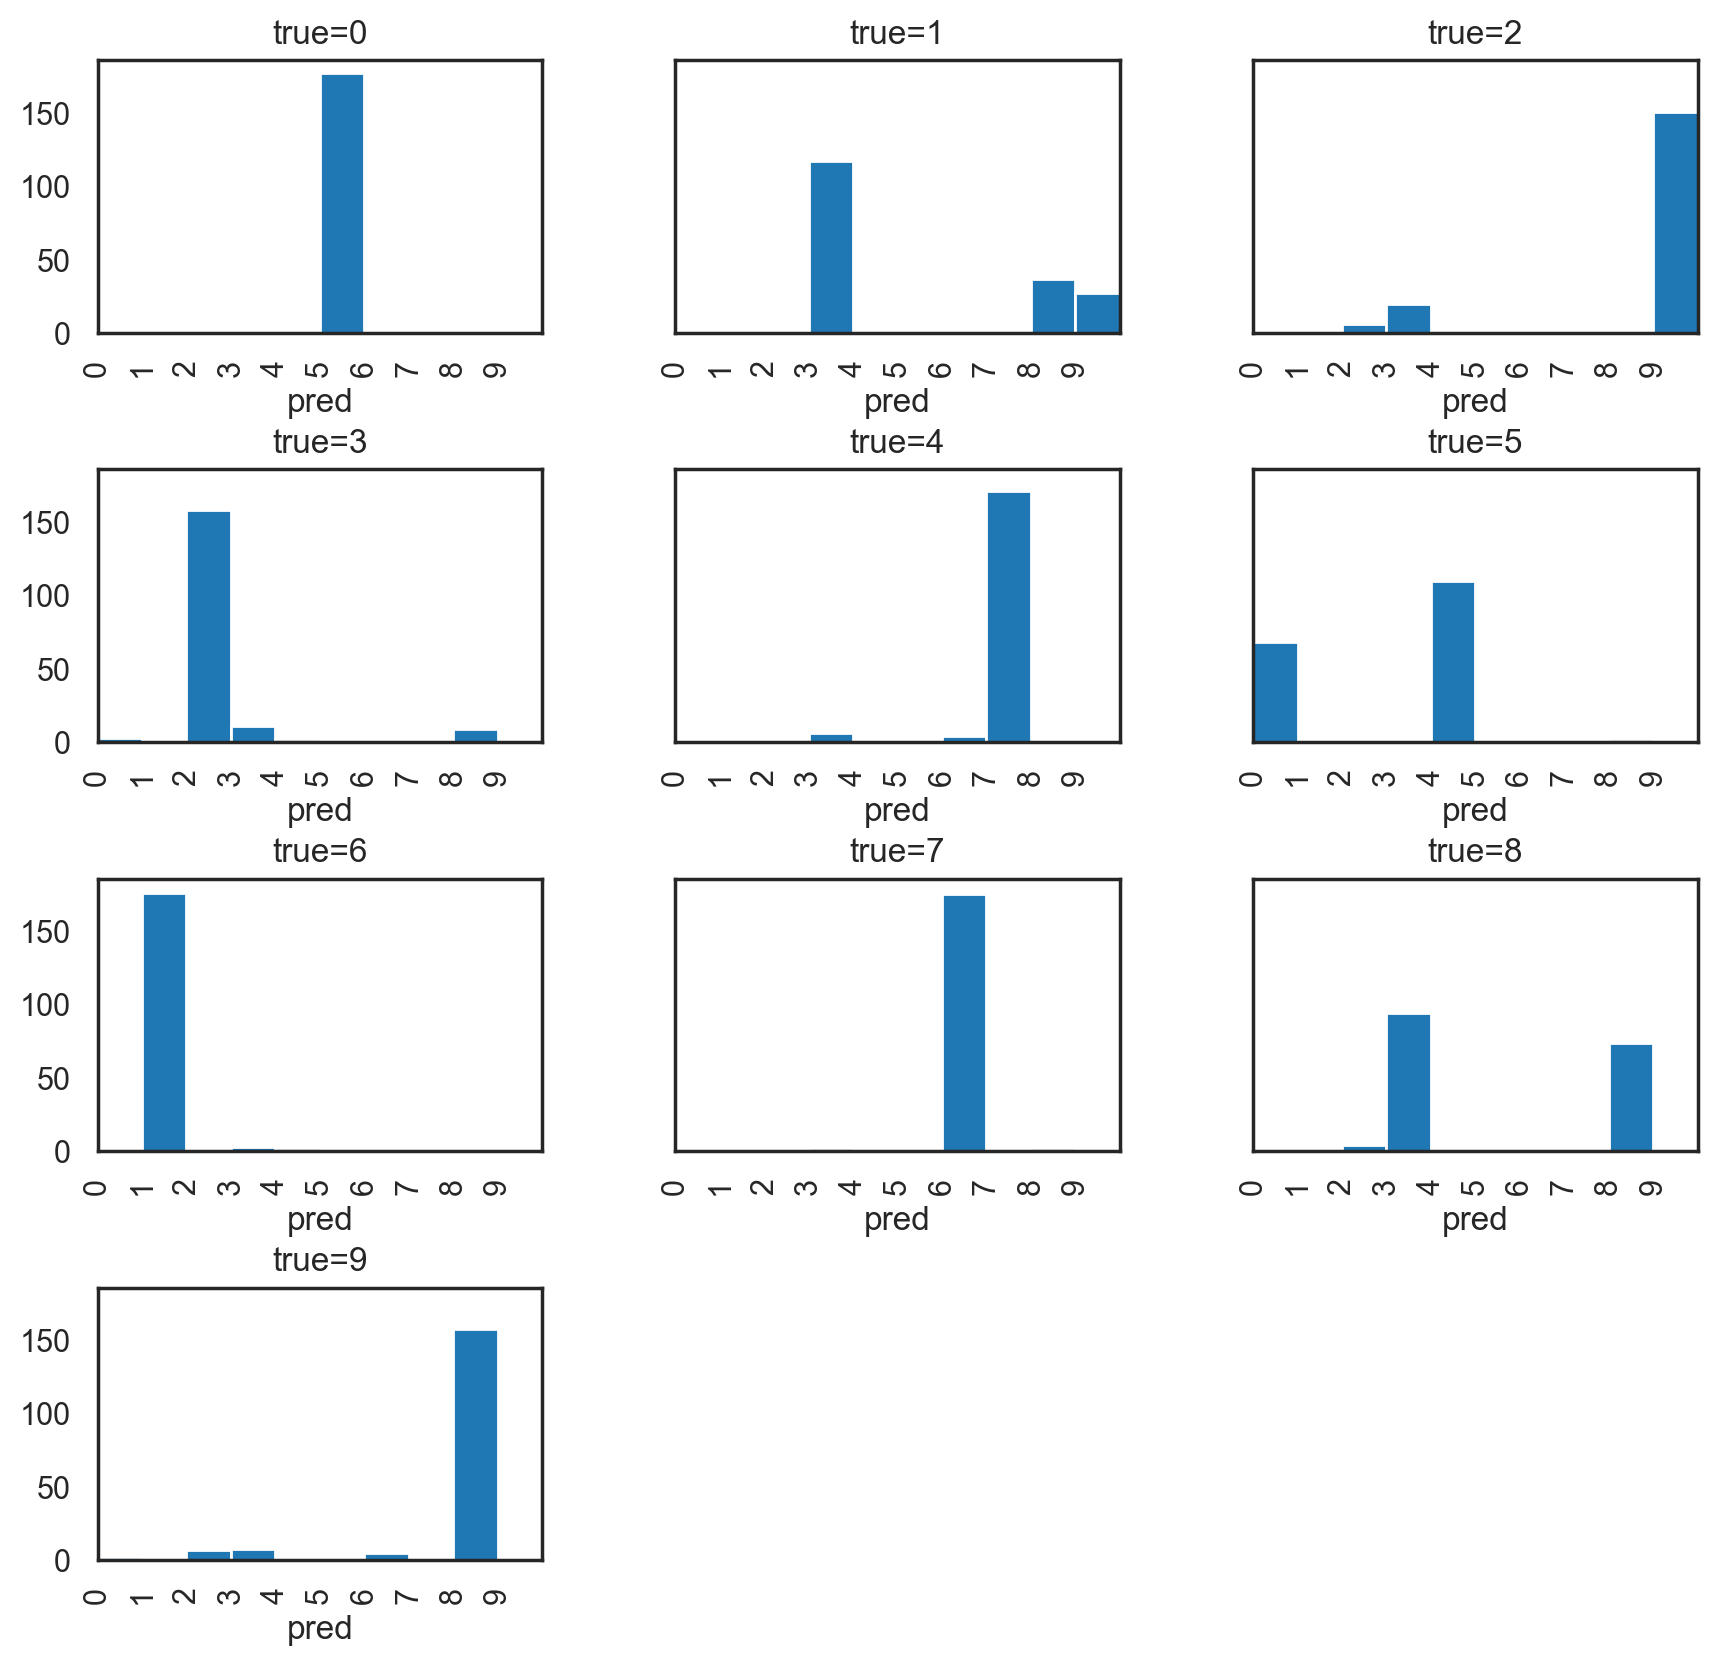

In [ ]:
axs=gmm_pred.hist(column='pred',by='true',sharey=True, figsize=(10,10), bins=range(11));
for ax in axs.ravel():
    ax.set_xlim((0,10))
    ax.set_xticks(range(10))
    old=ax.get_title()
    ax.set_title('true='+old)
    ax.set_xlabel('pred')

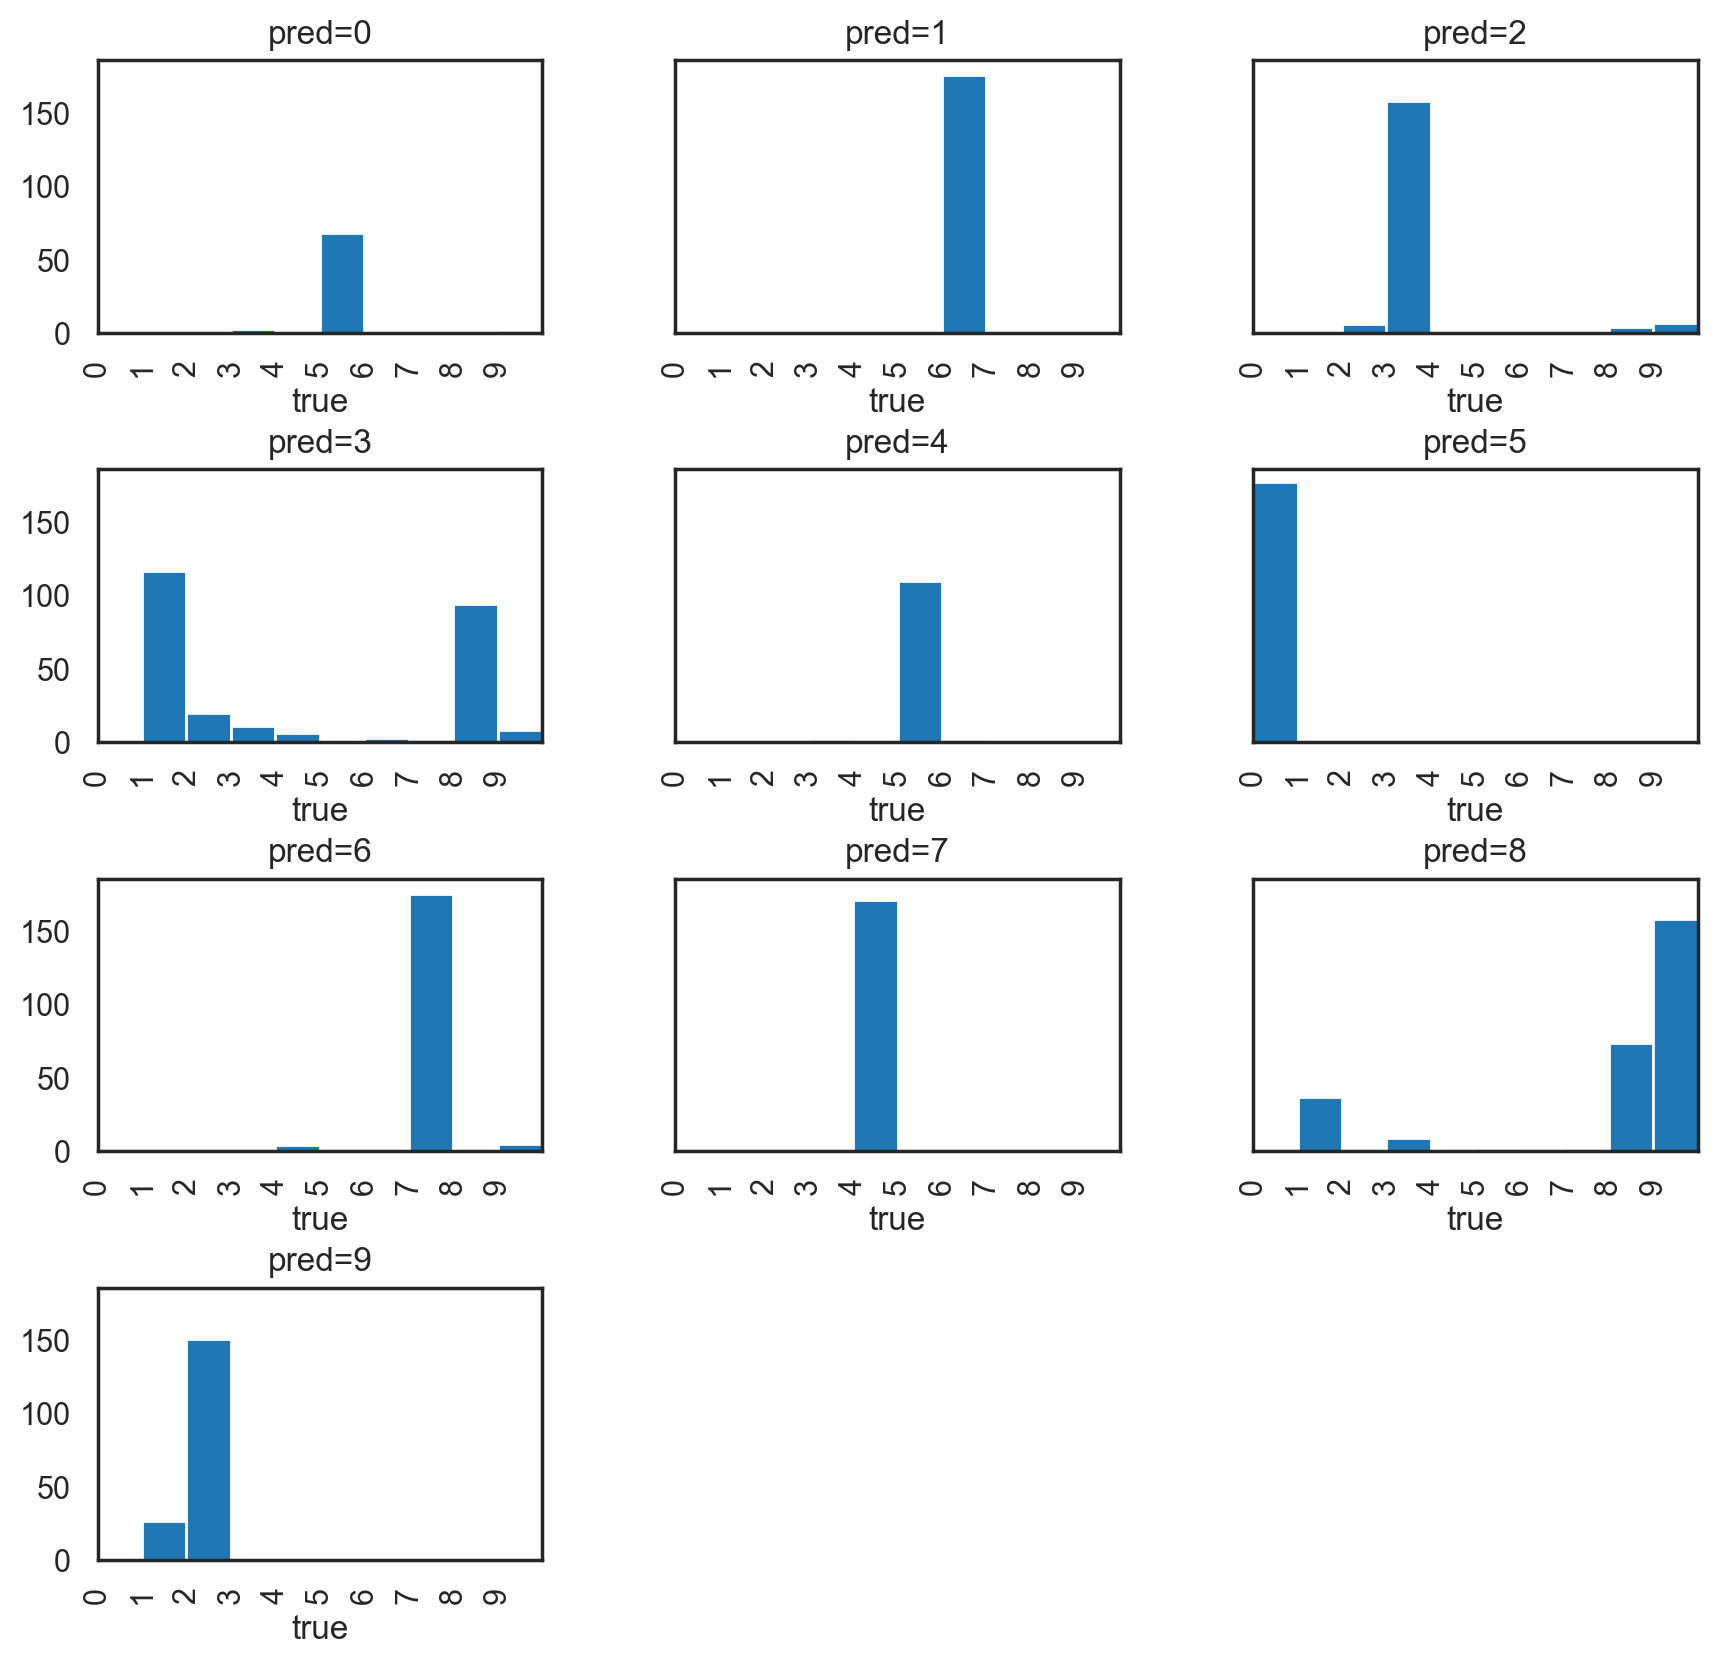

In [ ]:
axs=gmm_pred.hist(column='true',by='pred',sharey=True, figsize=(10,10), bins=range(11));
for ax in axs.ravel():
    ax.set_xlim((0,10))
    ax.set_xticks(range(10))
    old=ax.get_title()
    ax.set_title('pred='+old)
    ax.set_xlabel('true')

OK, now in the next cell discuss your results above.  

Please give us some insights... think deeply about the plots and empirical results in light of what you know about the clustering method, the metrics, and the visualizations.  If you just copy/paste some definitions and say "yes/no" you will not be getting full points.

1. Do you think that the clustering produced by the Mixture Model is any good for predicting the true label?  Why or why not... please include evidence from the viz and the scores above. Compare the clustering produced by the Mixture Model with the one produced by the KMeans. 

1. Given the covariance argument passed to the Mixture Model, and the fact that the Mixture Model produced better results, what does that imply about the strucuture of the problem?



_Points:_ 0.6

1. The Gaussian Mixture Model is a better predictor of the true scores than KMeans as indicated by the adjusted Rand indexes of, respectively, 0.68 and 0.59. Nonetheless, GMM is not a satisfactory classifier of hand-written digits. For example, the predicted cluster of 2s contains mostly pictures of 4s, and the predicted cluster of 5s contains only 0s. Some clusters are significantly more accurate than the KMeans prediction, as in the case of the digit 7.    

2. The 'tied' argument passed into the Gaussian Mixture Models constrains all the clusters to share the same covariance matrix, meaning the shape of all the clusters should be similar, with possibly different means and spacial orientations. Given that the clusters share the same covariance matrix, and that GMM performed better than KMeans,

<!-- END QUESTION -->

## The End of A2

Have a look back over your answers, and also make sure to `Restart & Run All` from the kernel menu to double check that everything is working properly. This restarts everything and runs your code from top to bottom.

Once you're happy with your work, click the disk icon to save, and submit the zip file onto gradescope. **You MUST submit all the required component to receive credit.**

Note that you can submit at any time, but **we grade your most recent submission**. This means that **if you submit an updated notebook after the submission deadline, it will be marked as late**.

_Note:_ If you encountered `LatexFailed` message during exporting, or has the `AttributeError: module 'nbconvert' has no attribute 'pdf'` error, it indicates that your $\LaTeX$ code is not correct. Try to the LaTeX syntax error by scrolling up to see the LaTeX error message. If you need any additional helps, please make a private post on campuswire and we are happy to help.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Please make sure to see the output of the gradescope autograder. You are responsible for waiting and ensuring that the autograder is executing normally for your submission. Please create a campuswire post if you see errors in autograder execution.

In [4]:
grader.export(force_save=True, run_tests=True, files=['imgs'])

<IPython.core.display.Javascript object>

/Users/olimpiacarrioli/Assignments_WI24-1/COGS118B_venv/lib/python3.9/site-packages/otter/check/notebook.py:434: UserWarning: Couldn't automatically save the notebook; we recommend using File > Save & Checkpoint and then re-running this cell. The zip file returned by this call will use the last saved version of this notebook.
  warnings.warn(


AttributeError: module 'nbconvert' has no attribute 'pdf'